In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
og = pd.read_csv('data/GoodReads_100k_books.csv')
clean_book = pd.read_csv('data/current_data_6.10.csv')

In [3]:
og['pages'] = og['pages'].apply(lambda x: np.nan if x == 0 else x)
og['rating'] = og['rating'].apply(lambda x: np.nan if x == 0 else x)
og['totalratings'] = og['totalratings'].apply(lambda x: np.nan if x==0 else x)

In [4]:
og.isnull().sum()

author              0
bookformat       3228
desc             6772
genre           10467
img              3045
isbn            14482
isbn13          11435
link                0
pages            7752
rating           1562
reviews             0
title               1
totalratings     1562
dtype: int64

In [5]:
clean_book = clean_book.loc[:, ~clean_book.columns.str.contains('^Unnamed')] #delete Unnamed columns pandas
clean_book['page_count'] = clean_book['page_count'].apply(lambda x: np.nan if x == 0 else x)
clean_book.isnull().sum()

author              0
book_format         0
description         0
genre               0
cover_img           0
isbn                0
link                0
page_count       2151
rating              0
review_count        0
title               0
rating_count        0
price           43916
dtype: int64

In [6]:
genres = dict()

g_og = og.loc[~og['genre'].isnull()]
for _, row in g_og.iterrows():
    genre_list = row['genre'].split(',')
    for g in genre_list:
        if g not in genres:
            genres[g] = 0
        genres[g] += 1

genres

{'History': 15477,
 'Military History': 1828,
 'Civil War': 664,
 'American History': 2028,
 'American Civil War': 499,
 'Nonfiction': 29446,
 'North American Hi...': 1676,
 'Native Americans': 184,
 'Couture': 456,
 'Fashion': 455,
 'Historical': 18183,
 'Art': 5916,
 'Politics': 4353,
 'Labor': 193,
 'Business': 3577,
 'Leadership': 811,
 'Romance': 34324,
 'Historical Romance': 3657,
 'Management': 490,
 'Human Resources': 24,
 'Religion': 12323,
 'Buddhism': 710,
 'Philosophy': 5486,
 'Spirituality': 2980,
 'Psychology': 3402,
 'Anthropology': 992,
 'Academic': 4717,
 'Social Science': 637,
 'Sociology': 1862,
 'Biology': 1513,
 'Ecology': 239,
 'Economics': 1835,
 'Science': 10676,
 'Self Help': 3388,
 'Personal Development': 896,
 'Writing': 3107,
 'Journalism': 309,
 'Cultural': 14640,
 'France': 1422,
 'Autobiography': 4544,
 'Memoir': 3255,
 'World War II': 1378,
 'Holocaust': 353,
 'War': 5625,
 'Biography': 7101,
 'Biography Memoir': 1952,
 'Literature': 11422,
 'Jewish': 53

In [7]:
print("Number of genres: ", len(genres.keys()))

Number of genres:  1182


In [8]:
genres_clean = dict()

g_clean = clean_book.loc[~clean_book['genre'].isnull()]
for _, row in g_clean.iterrows():
    genre_list = row['genre'].split(',')
    for g in genre_list:
        if g not in genres_clean:
            genres_clean[g] = 0
        genres_clean[g] += 1

genres_clean

{'History': 11674,
 'Military History': 1486,
 'Civil War': 613,
 'American History': 1747,
 'American Civil War': 347,
 'Nonfiction': 26448,
 'Native Americans': 172,
 'North American History': 1594,
 'Couture': 432,
 'Fashion': 432,
 'Historical': 9057,
 'Art': 4057,
 'Politics': 3253,
 'Labor': 171,
 'Business': 2092,
 'Leadership': 740,
 'Romance': 12294,
 'Historical Romance': 2081,
 'Management': 431,
 'Human Resources': 19,
 'Religion': 5622,
 'Buddhism': 467,
 'Philosophy': 4037,
 'Spirituality': 2522,
 'Psychology': 2765,
 'Anthropology': 828,
 'Academic': 3267,
 'Social Science': 568,
 'Sociology': 1533,
 'Biology': 1058,
 'Ecology': 229,
 'Economics': 1313,
 'Science': 6210,
 'Self Help': 2262,
 'Personal Development': 781,
 'Writing': 2341,
 'Journalism': 283,
 'Cultural': 10120,
 'France': 1164,
 'Autobiography': 3133,
 'Memoir': 2987,
 'World War II': 985,
 'Holocaust': 319,
 'War': 3166,
 'Biography': 5273,
 'Biography Memoir': 1846,
 'Literature': 6926,
 'Jewish': 497,


#### Original Data set Statistics

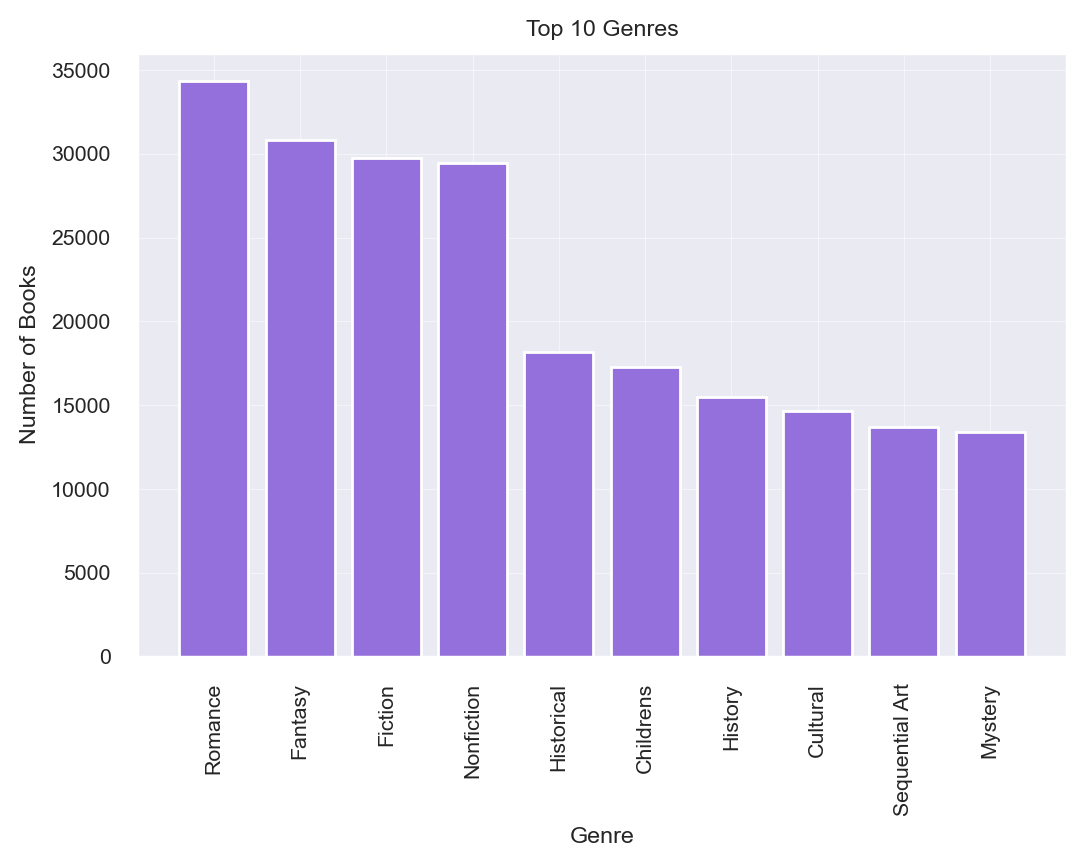

In [9]:
from collections import Counter
sns.set(style = 'darkgrid',font_scale=0.70,rc={"grid.linewidth": 0.2})
plt.figure(dpi=200)
top_10_genres = dict(Counter(genres).most_common(10))

plt.title("Top 10 Genres")
plt.xlabel("Genre")
plt.ylabel("Number of Books")
plt.xticks(rotation=90)
plt.bar(list(top_10_genres.keys()), list(top_10_genres.values()), color='mediumpurple')
plt.show()

In [10]:
avg_ratings = []
avg_totalratings = []
avg_reviews = []

temp = og.loc[~og['genre'].isnull()]

for genre in top_10_genres.keys():
    ratings = []
    totalratings = []
    reviews = []
    for _, row in temp.iterrows():
        if genre in row['genre'].split(','):
            ratings.append(row['rating'])
            totalratings.append(row['totalratings'])
            reviews.append(row['reviews'])
            
    avg_ratings.append(np.nanmean(ratings))
    avg_totalratings.append(np.nanmean(totalratings))
    avg_reviews.append(np.nanmean(reviews))

In [56]:
genre_og = pd.DataFrame(data=list(top_10_genres.keys()), columns=["genre"])
genre_og
genre_og['avg_rating'] = avg_ratings
genre_og['avg_totalratings'] = avg_totalratings
genre_og['avg_review'] = avg_reviews
genre_og

genre  avg_rating  avg_totalratings  avg_review
0         Romance    3.720206        178.176342   13.838880
1         Fantasy    3.838793       1084.701182   56.113331
2         Fiction    3.855499        997.774098   69.962208
3      Nonfiction    3.832126        882.743636   79.067441
4      Historical    3.815565       1178.053734   91.760929
5       Childrens    3.848490       1701.167590  135.861034
6         History    3.872026       2229.941270  180.997354
7        Cultural    3.857582       1590.433273  139.882107
8  Sequential Art    3.863072       2069.699282  115.107632
9         Mystery    3.836161        990.179720   52.309091

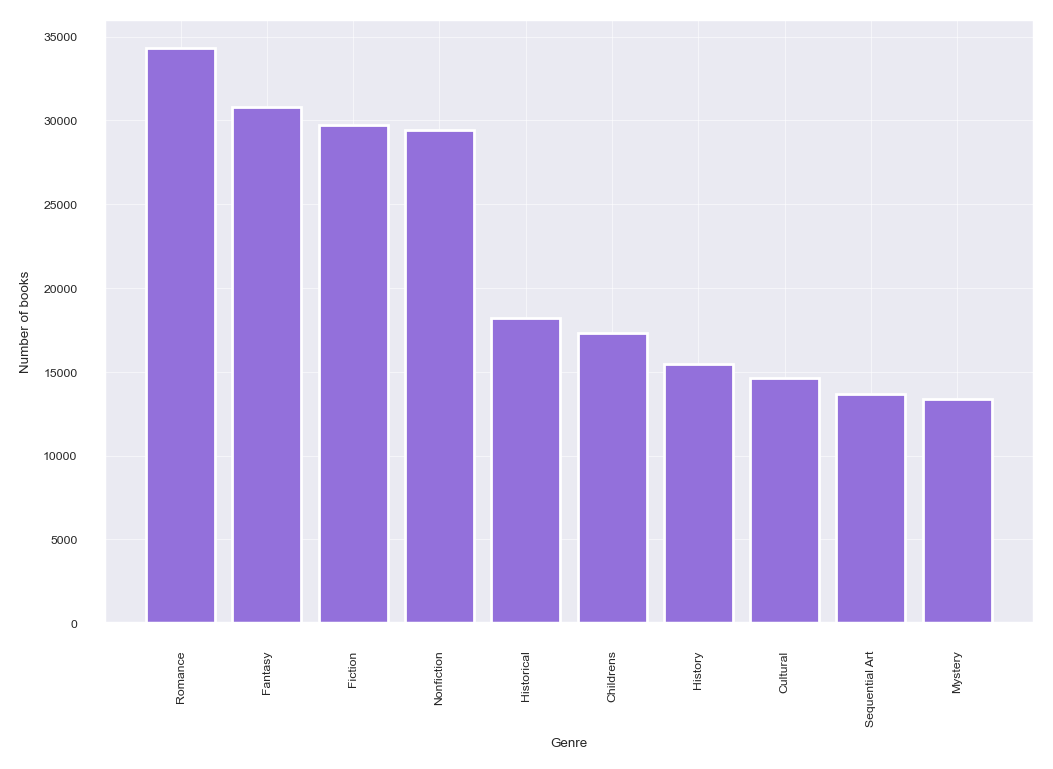

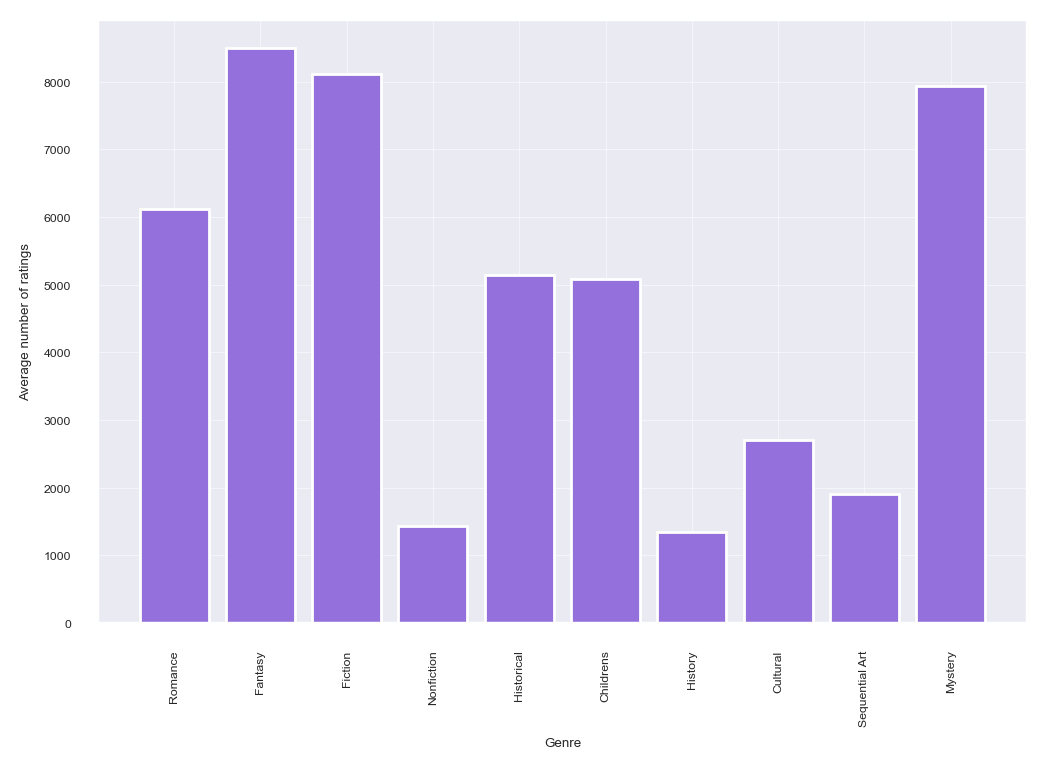

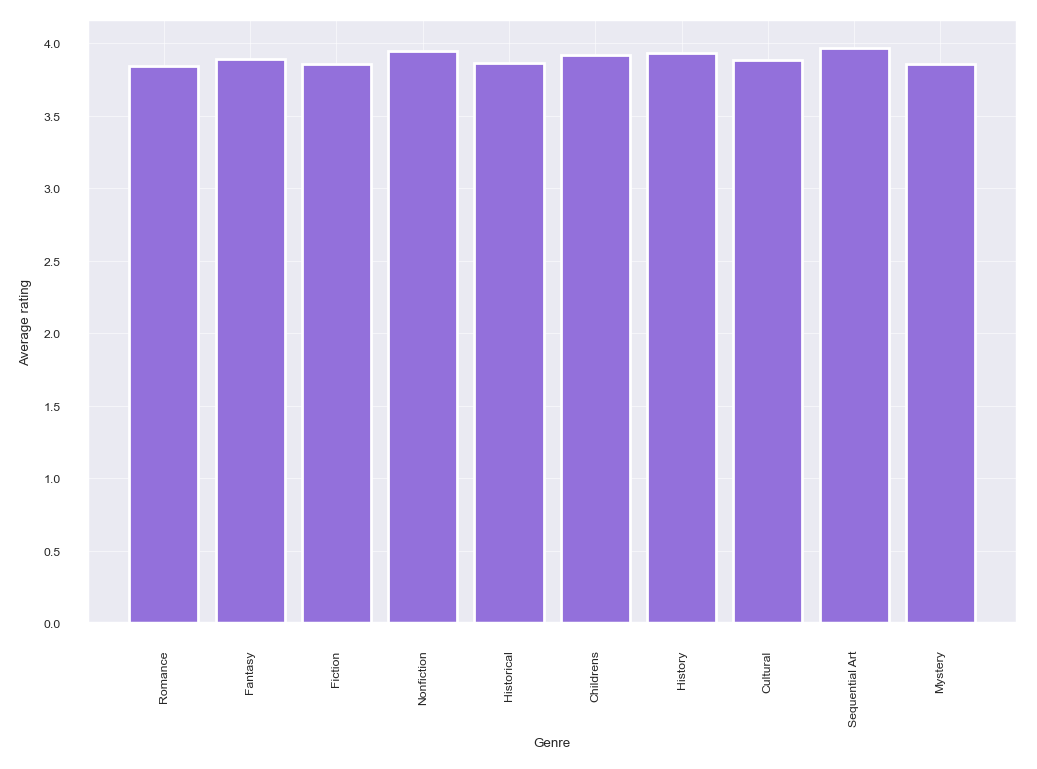

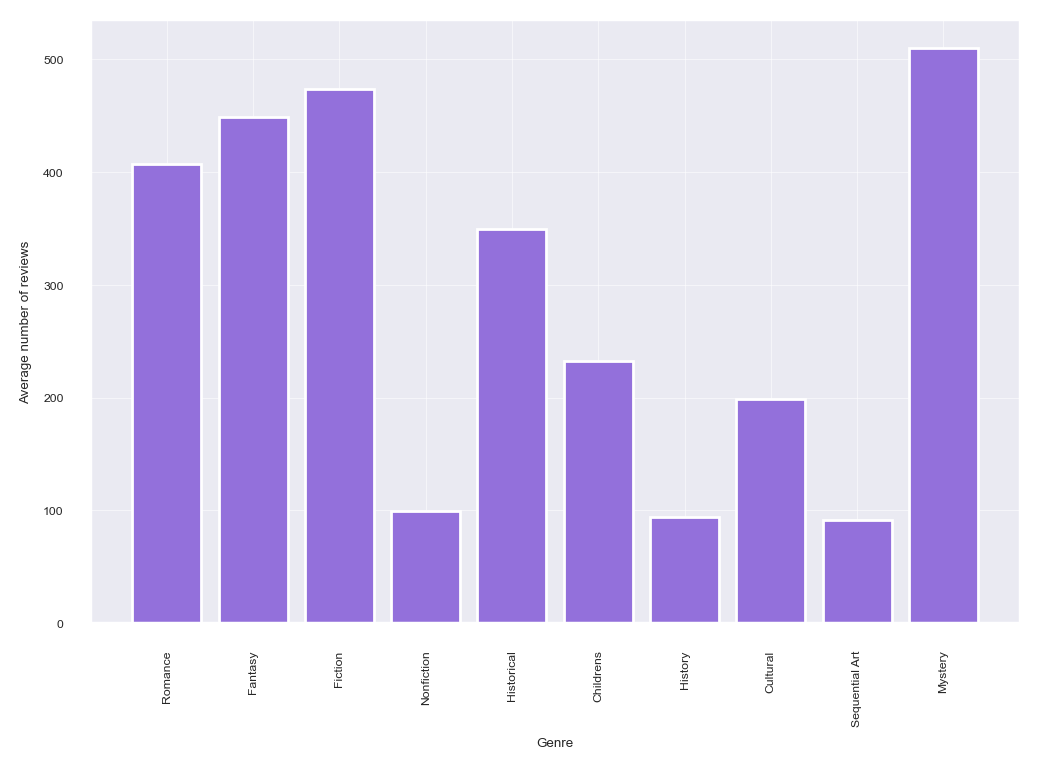

In [99]:
labels = ["Number of books", "Average number of ratings", "Average rating", "Average number of reviews"]
values = [list(top_10_genres.values()), avg_totalratings, avg_ratings, avg_reviews]
for i in range(4):
    plt.figure(dpi=200)
    plt.xlabel("Genre")
    plt.ylabel(labels[i])
    plt.xticks(rotation=90)
    plt.bar(list(top_10_genres.keys()), values[i], color='mediumpurple')
    plt.show()

In [104]:
top_10_bookformats = dict(Counter(dict(og.bookformat.value_counts())).most_common(10))
top_10_bookformats

{'Paperback': 53855,
 'Hardcover': 27581,
 'ebook': 5328,
 'Kindle Edition': 4569,
 'Mass Market Paperback': 3024,
 'Unknown Binding': 449,
 'Nook': 395,
 'Audio CD': 318,
 'Board Book': 164,
 'Spiral-bound': 137}

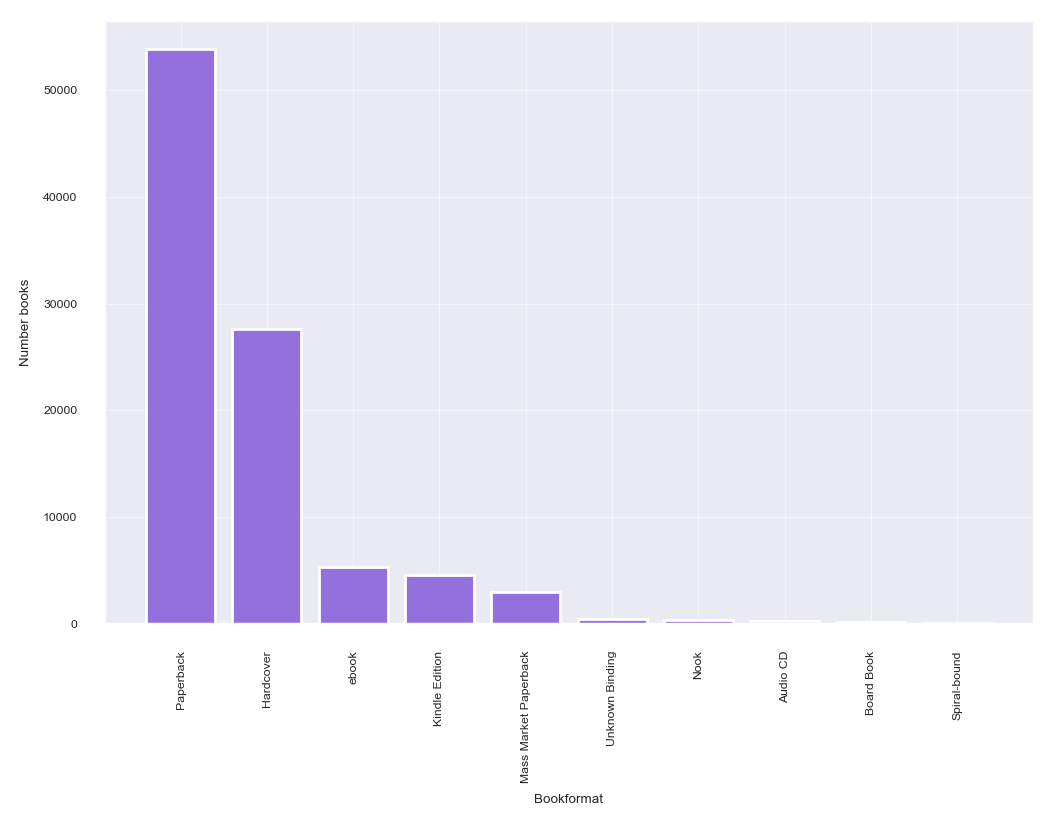

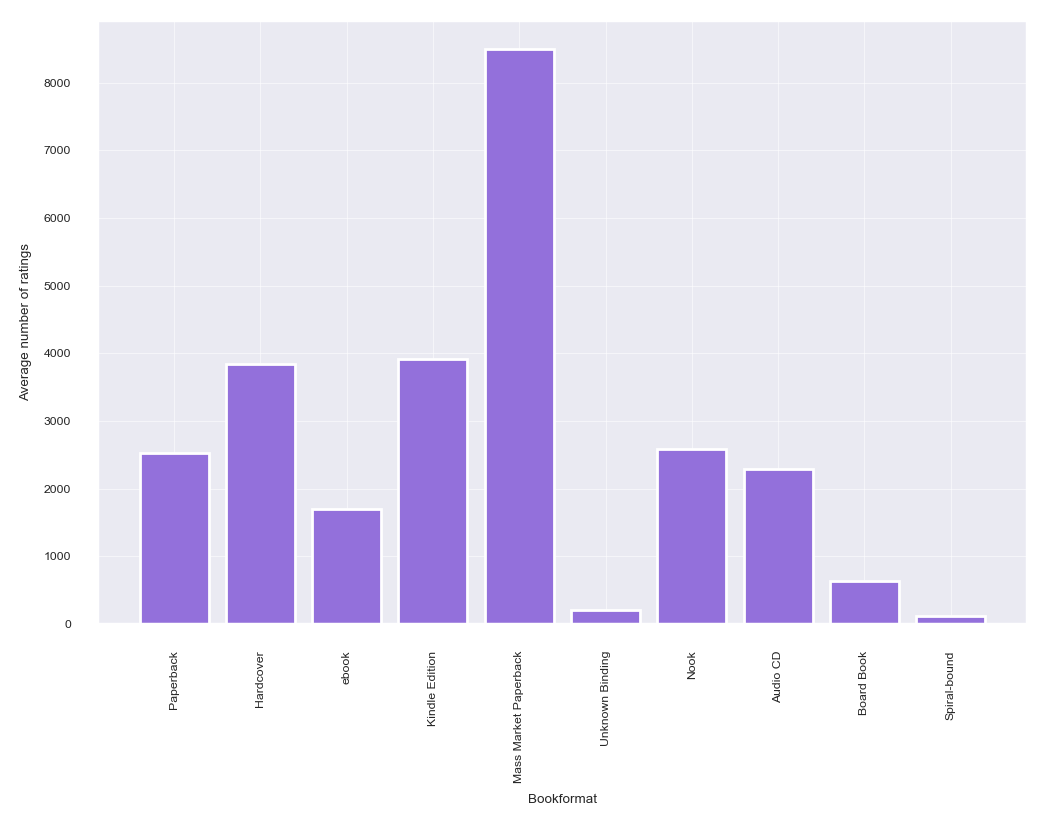

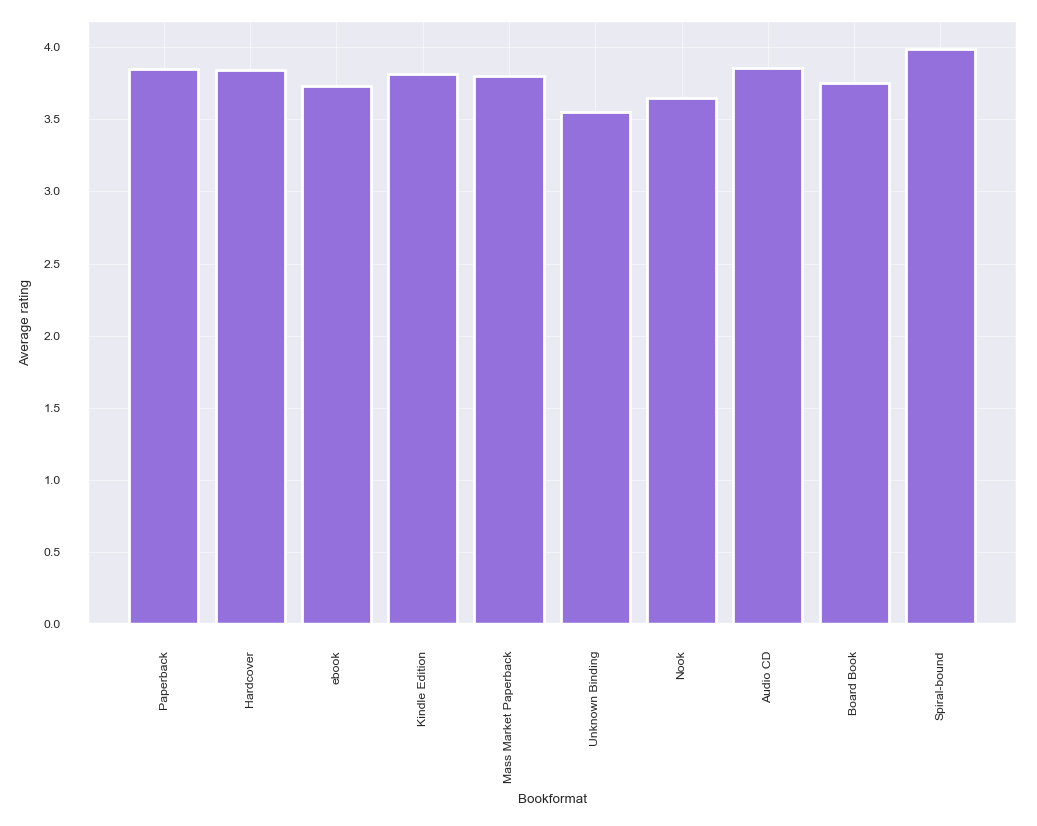

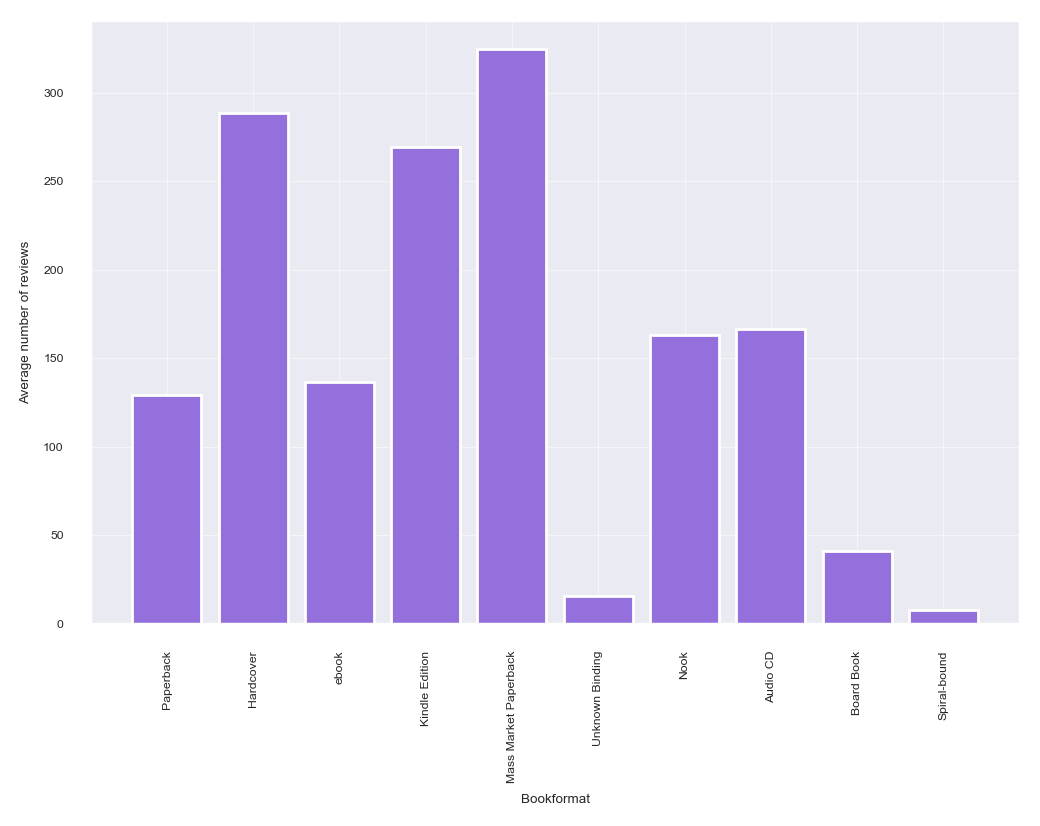

In [107]:
avg_ratings = []
avg_totalratings = []
avg_reviews = []

for i in top_10_bookformats.keys():
    temp = og.loc[og['bookformat'] == i]
    avg_ratings.append(temp['rating'].mean())
    avg_totalratings.append(temp['totalratings'].mean())
    avg_reviews.append(temp['reviews'].mean())



labels = ["Number books", "Average number of ratings", "Average rating", "Average number of reviews"]
values = [list(top_10_bookformats.values()), avg_totalratings, avg_ratings, avg_reviews]
for i in range(4):
    plt.figure(dpi=200)
    plt.xlabel("Bookformat")
    plt.ylabel(labels[i])
    plt.xticks(rotation=90)
    plt.bar(list(top_10_bookformats.keys()), values[i], color='mediumpurple')
    plt.show()





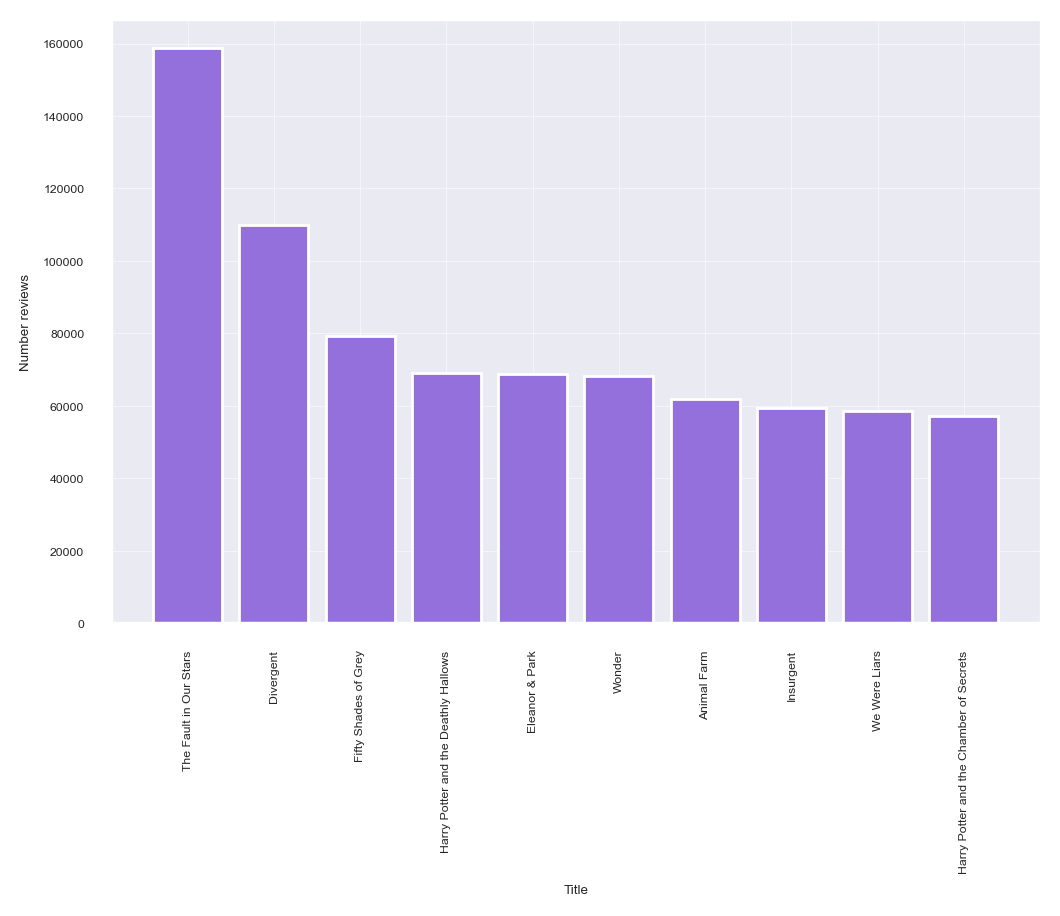

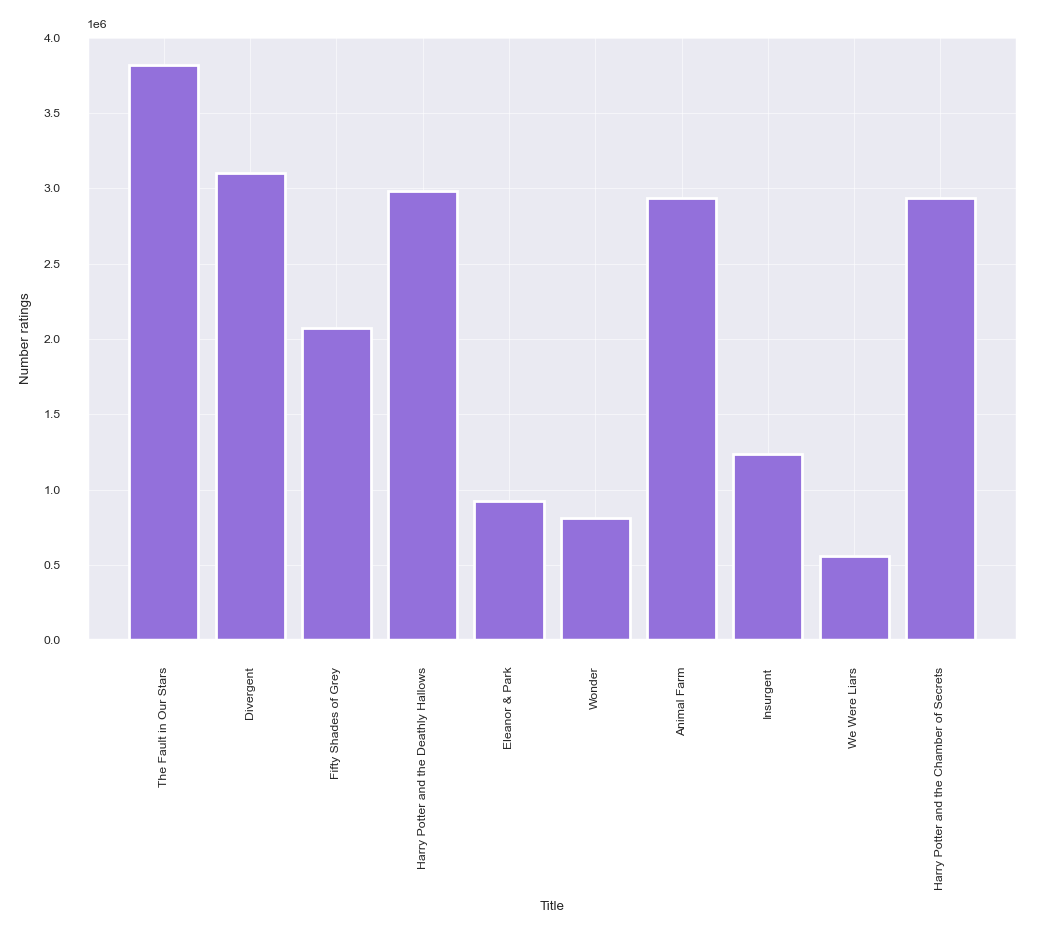

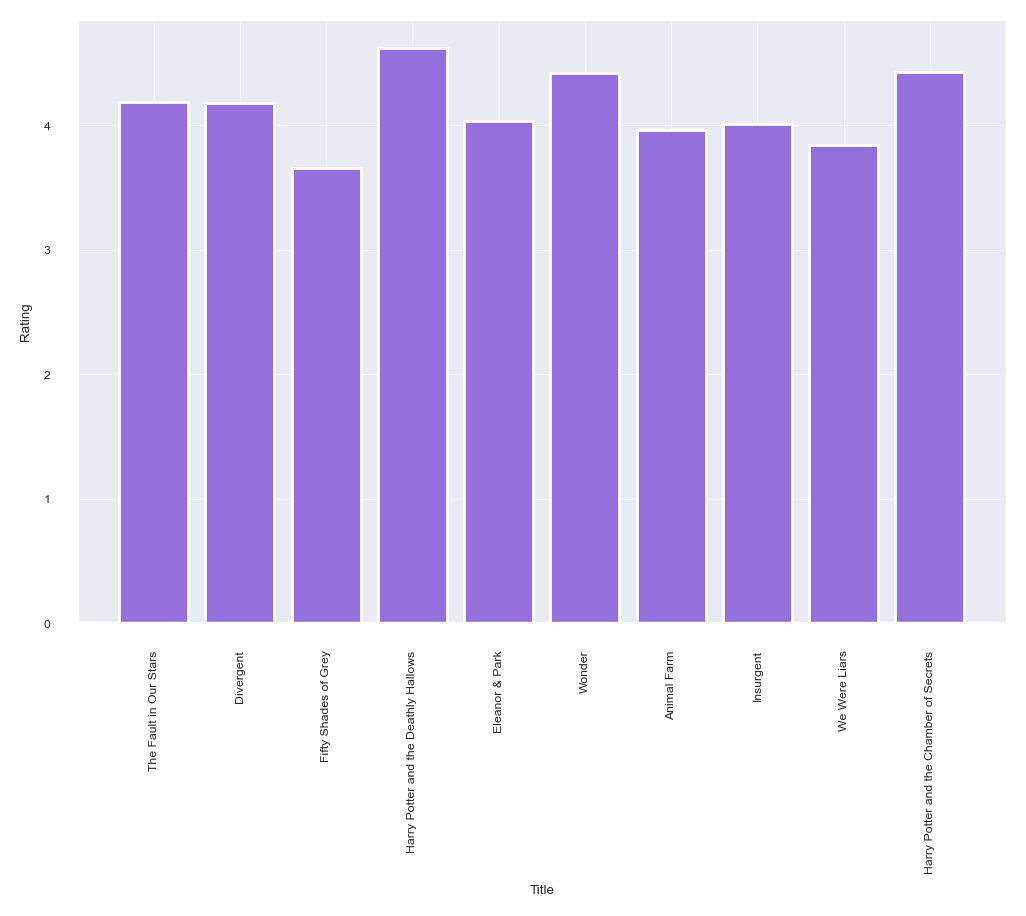

In [111]:
top_10_reviews = og.sort_values(by='reviews', ascending=False)[:10]
top_10_reviews

book_title = []
rating = []
totalratings = []
reviews = []

for _, row in top_10_reviews.iterrows():
    book_title.append(row['title'])
    rating.append(row['rating'])
    totalratings.append(row['totalratings'])
    reviews.append(row['reviews'])

labels = ["Number reviews", "Number ratings", "Rating"]
values = [reviews, totalratings, rating]
for i in range(3):
    plt.figure(dpi=200)
    plt.xlabel("Title")
    plt.ylabel(labels[i])
    plt.xticks(rotation=90)
    plt.bar(book_title, values[i], color='mediumpurple')
    plt.show()

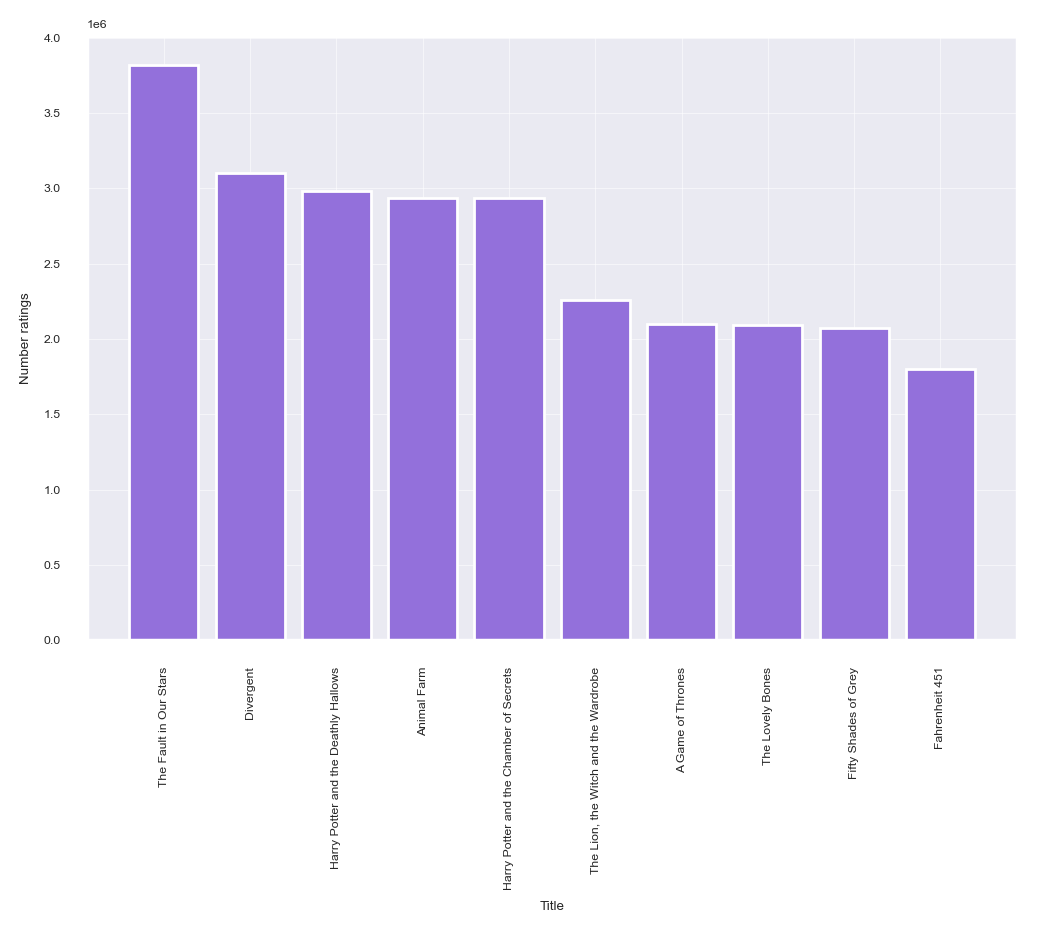

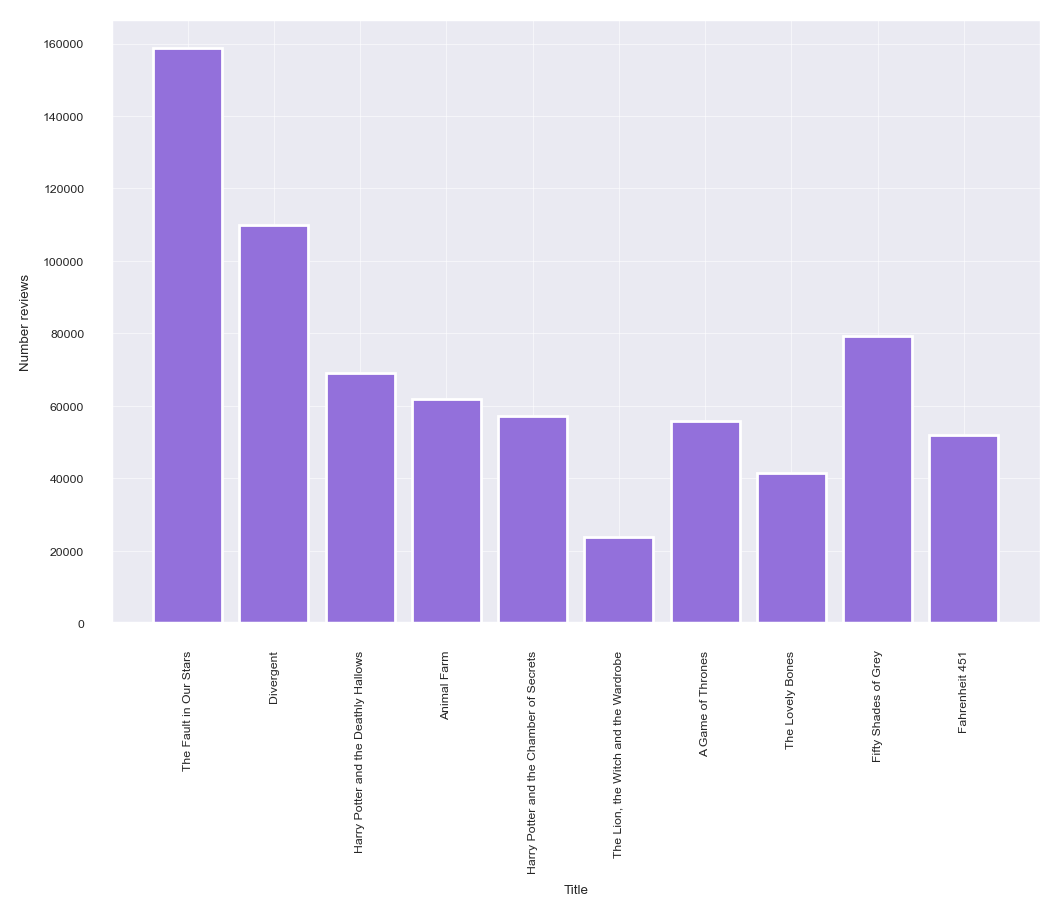

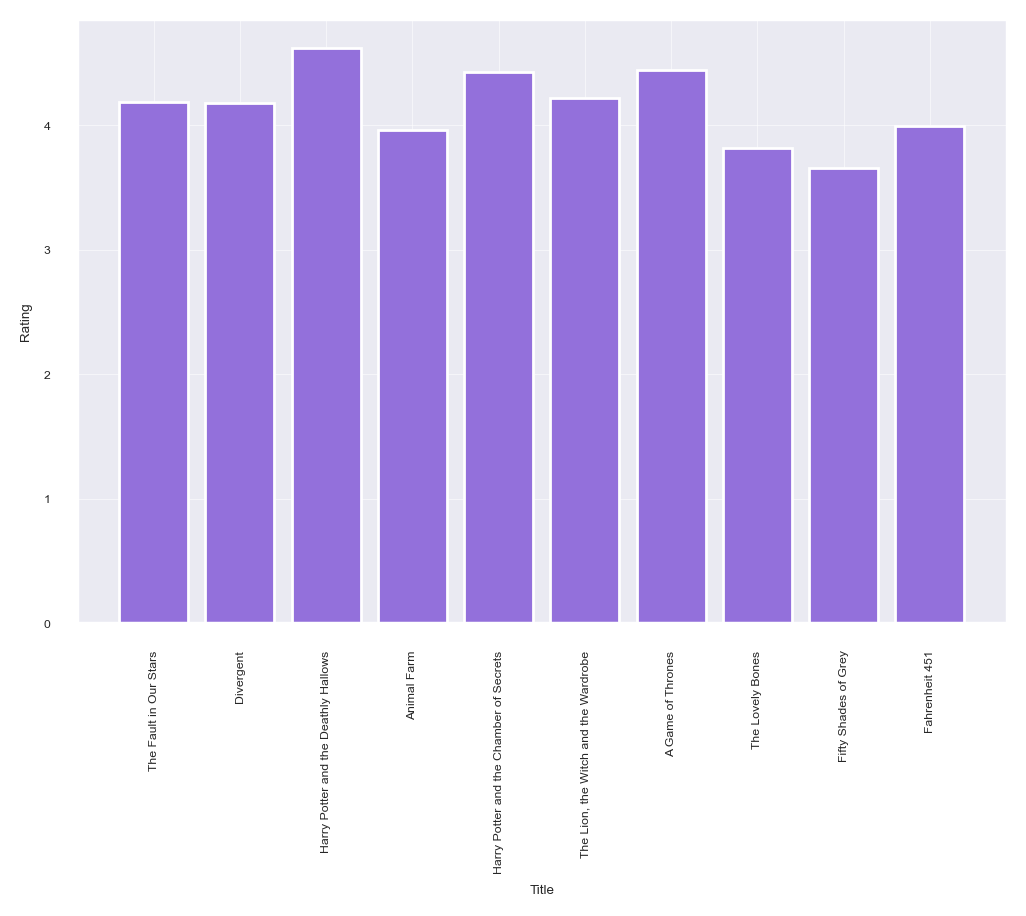

In [113]:
top_10_ratings = og.sort_values(by='totalratings', ascending=False)[:10]

book_title = []
rating = []
totalratings = []
reviews = []

for _, row in top_10_ratings.iterrows():
    book_title.append(row['title'])
    rating.append(row['rating'])
    totalratings.append(row['totalratings'])
    reviews.append(row['reviews'])

labels = ["Number ratings", "Number reviews", "Rating"]
values = [totalratings, reviews, rating]
for i in range(3):
    plt.figure(dpi=200)
    plt.xlabel("Title")
    plt.ylabel(labels[i])
    plt.xticks(rotation=90)
    plt.bar(book_title, values[i], color='mediumpurple')
    plt.show()

In [115]:
top_10_author = dict(Counter(dict(og.author.value_counts())).most_common(10))
top_10_author

{'Mi-Ri Hwang': 137,
 'Willy Vandersteen': 76,
 'Yu-Rang Han': 75,
 'R.L. Stine': 75,
 'Elinor M. Brent-Dyer': 63,
 'Lynn Hagen': 62,
 'Anonymous': 61,
 "Louis L'Amour": 57,
 'Lynne Graham': 55,
 'Agatha Christie': 54}

In [22]:
len(og.author.unique())

68767

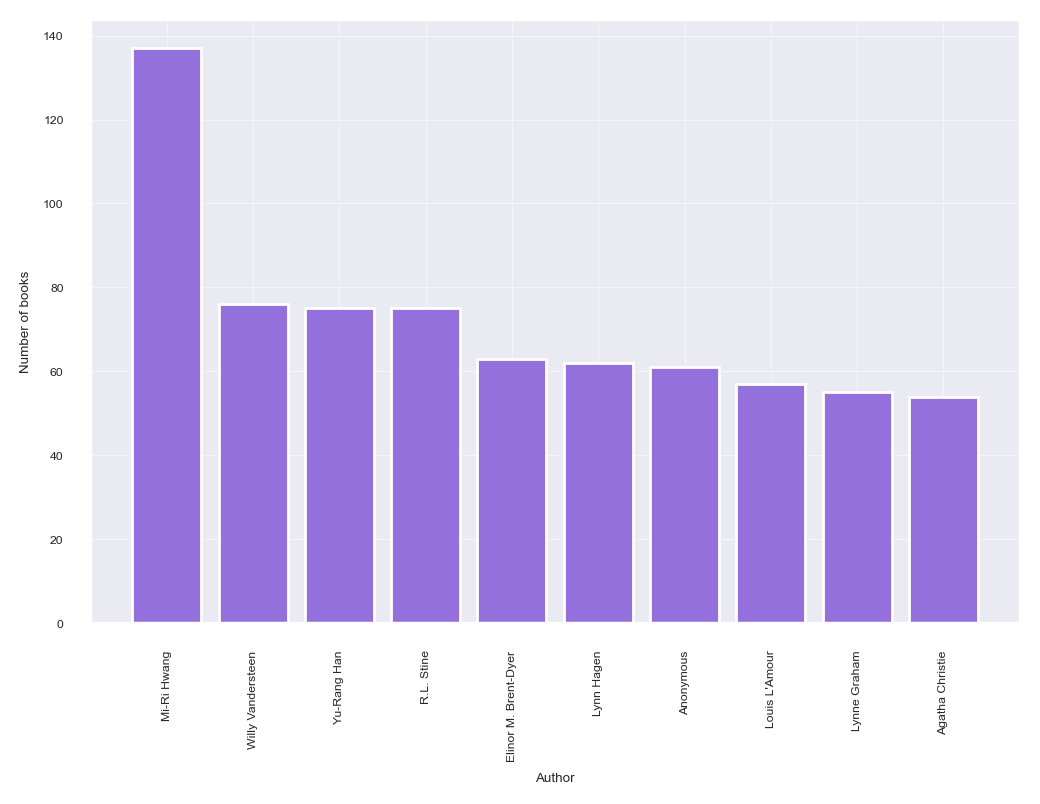

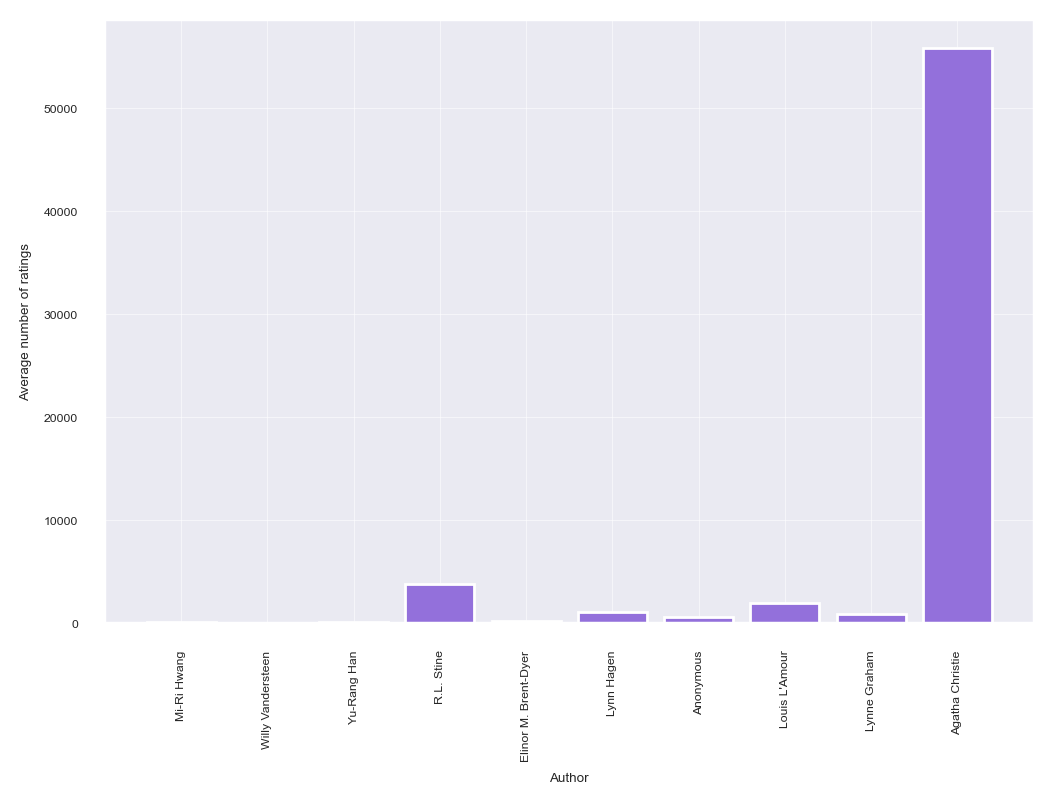

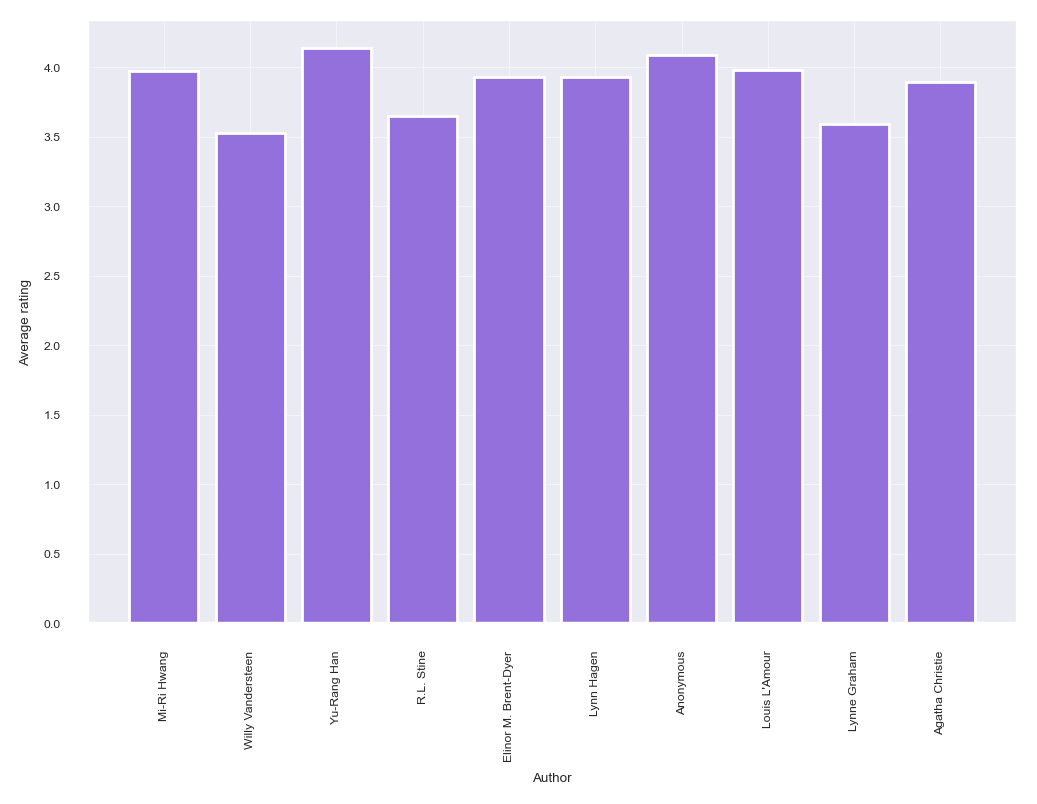

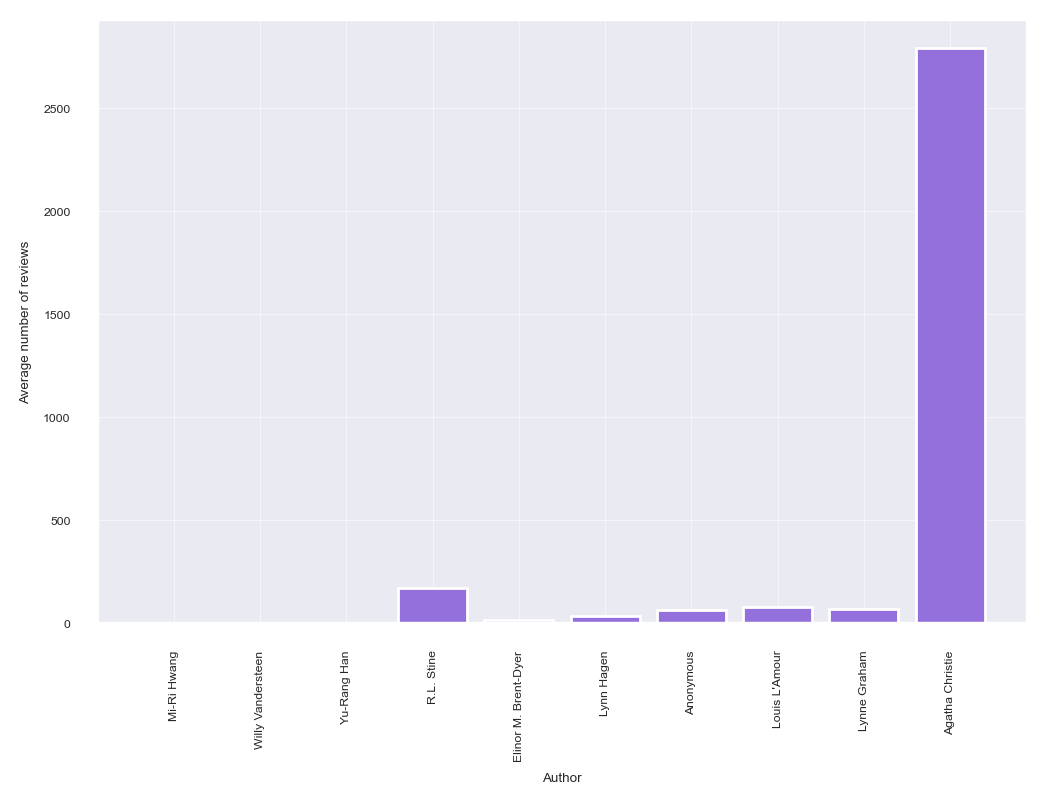

In [116]:
avg_ratings = []
avg_totalratings = []
avg_reviews = []

for author in top_10_author.keys():
    temp = og.loc[og['author'] == author]
    avg_ratings.append(temp['rating'].mean())
    avg_totalratings.append(temp['totalratings'].mean())
    avg_reviews.append(temp['reviews'].mean())

labels = ["Number of books", "Average number of ratings", "Average rating", "Average number of reviews"]
values = [list(top_10_author.values()), avg_totalratings, avg_ratings, avg_reviews]
for i in range(4):
    plt.figure(dpi=200)
    plt.xlabel("Author")
    plt.ylabel(labels[i])
    plt.xticks(rotation=90)
    plt.bar(list(top_10_author.keys()), values[i], color='mediumpurple')
    plt.show()

In [7]:
authors= pd.DataFrame(list(dict(og.author.value_counts())), columns=['Authors'])
authors['num_books'] = list(dict(Counter(dict(og.author.value_counts()))).values())
authors


Authors  num_books
0                                       Mi-Ri Hwang        137
1                                 Willy Vandersteen         76
2                                        R.L. Stine         75
3                                       Yu-Rang Han         75
4                              Elinor M. Brent-Dyer         63
...                                             ...        ...
68762                                     Ali Brown          1
68763                  Rebecca Odes,Ceridwen Morris          1
68764          Amy Besa,Romy Dorotan,Neal M. Oshima          1
68765  Simon A. Forward,Colin  Baker,Maggie Stables          1
68766                                   Kendel Lynn          1

[68767 rows x 2 columns]

<AxesSubplot:xlabel='num_books', ylabel='Authors'>

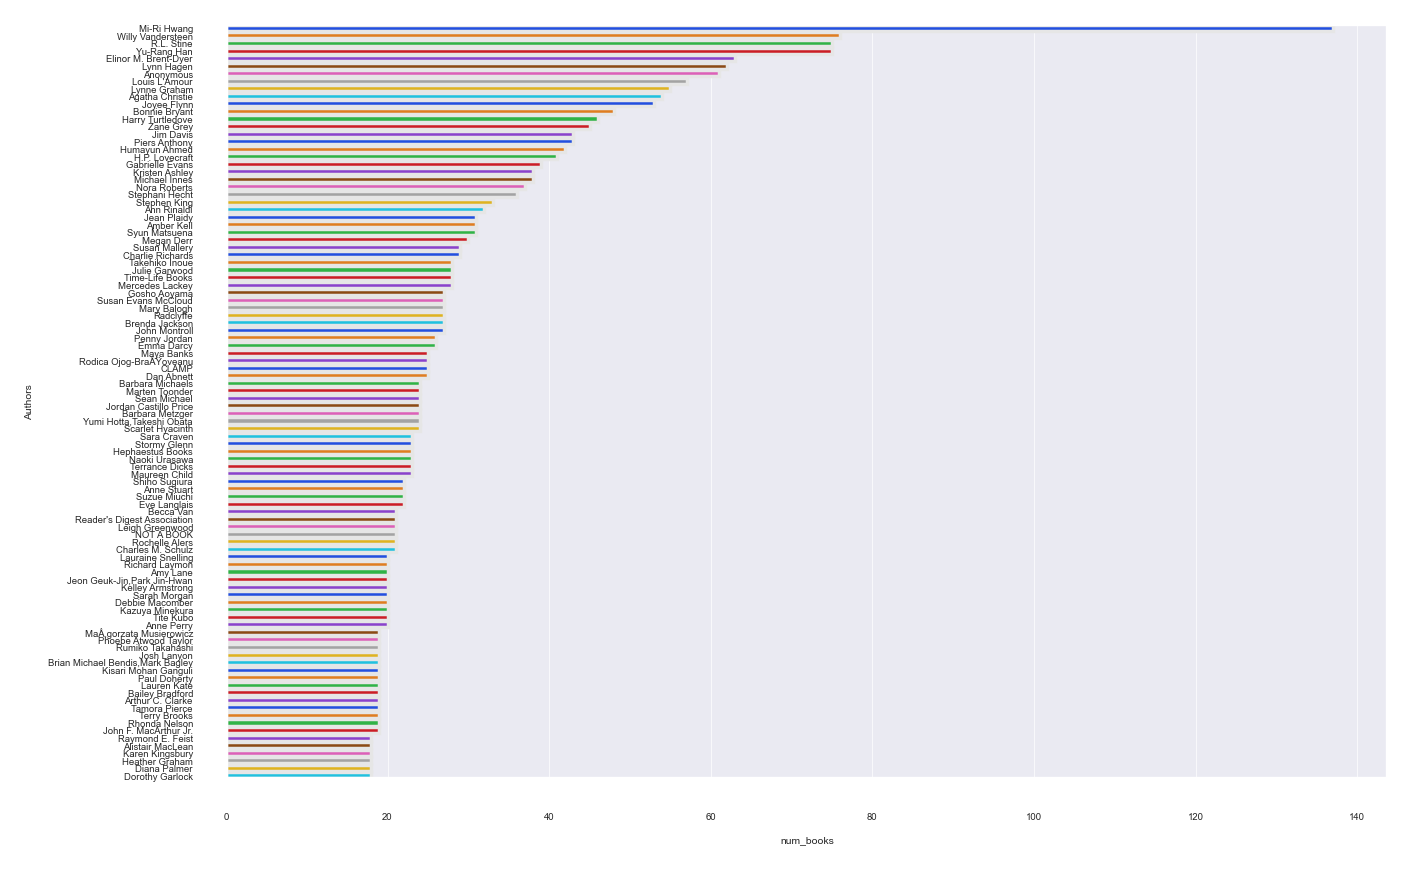

In [8]:
plt.figure(dpi=250)
palette = sns.color_palette("bright",15)
sns.set(style = 'darkgrid',font_scale=0.25,rc={"grid.linewidth": 0.2})

sns.barplot(y='Authors',x='num_books',
                palette=palette, 
                edgecolor=".9",
                data=authors[:100] )

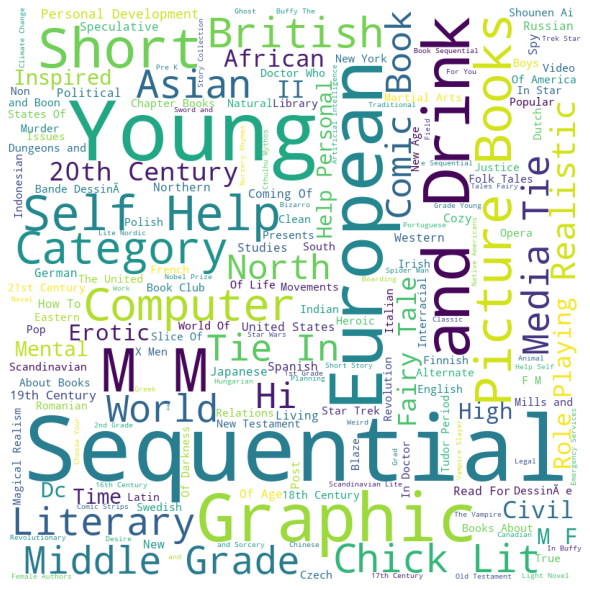

In [23]:
comment_words = ''

g_og = og.loc[~og['genre'].isnull()]
for _, row in g_og.iterrows():
    genre_list = row['genre'].split(',')
    for g in genre_list:
        g.replace(" ", "")
    comment_words += " ".join(genre_list) + " "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = genres.keys(),
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [11]:
og.describe()

pages         rating        reviews  totalratings
count  100000.000000  100000.000000  100000.000000  1.000000e+05
mean      255.010240       3.833055     181.528450  2.990764e+03
std       367.913582       0.621237    1449.451229  3.635338e+04
min         0.000000       0.000000       0.000000  0.000000e+00
25%       135.000000       3.660000       3.000000  3.100000e+01
50%       240.000000       3.910000      15.000000  1.460000e+02
75%       336.000000       4.140000      67.000000  7.440000e+02
max     70000.000000       5.000000  158776.000000  3.819326e+06

array([[<AxesSubplot:title={'center':'pages'}>]], dtype=object)

<Figure size 1800x1200 with 0 Axes>

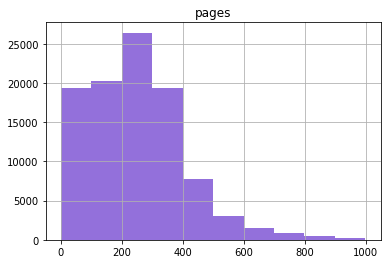

In [3]:
plt.figure(dpi=300)
og.loc[og['pages'] < 1000].hist(column='pages', color='mediumpurple')


<AxesSubplot:>

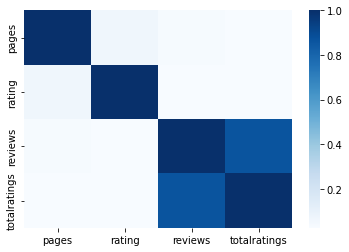

In [4]:
plt.figure(figsize=(6,4))
sns.heatmap(og.corr(),cmap='Blues',annot=False) 

In [22]:
pages= pd.DataFrame(list(dict(og.pages.value_counts())), columns=['Number of Pages'])
pages['Number of Books'] = list(dict(Counter(dict(og.pages.value_counts()))).values())
pages


Number of Pages  Number of Books
0                   0             7752
1                 192             2453
2                 224             2355
3                  32             2239
4                 256             2196
...               ...              ...
1352             1698                1
1353             1442                1
1354             1186                1
1355             1122                1
1356             1727                1

[1357 rows x 2 columns]

In [15]:
top_10_pages = dict(Counter(dict(og.pages.value_counts())).most_common(10))
top_10_pages

{0: 7752,
 192: 2453,
 224: 2355,
 32: 2239,
 256: 2196,
 288: 2166,
 320: 1890,
 304: 1671,
 240: 1533,
 128: 1430}

In [58]:
genre_og = pd.DataFrame(data=list(top_10_genres.keys()), columns=["genre"])
genre_og

genre
0         Romance
1         Fantasy
2         Fiction
3      Nonfiction
4      Historical
5       Childrens
6         History
7        Cultural
8  Sequential Art
9         Mystery

In [59]:
pd.crosstab(genre_og["genre"], og["reviews"])

reviews         1  2  5  6  7
genre                        
Childrens       0  0  0  0  1
Cultural        0  1  0  0  0
Fantasy         0  0  0  1  0
Fiction         0  1  0  0  0
Historical      1  0  0  0  0
History         1  0  0  0  0
Mystery         0  0  0  0  1
Nonfiction      1  0  0  0  0
Romance         0  0  1  0  0
Sequential Art  0  1  0  0  0

#### Clean Data Set Statistics

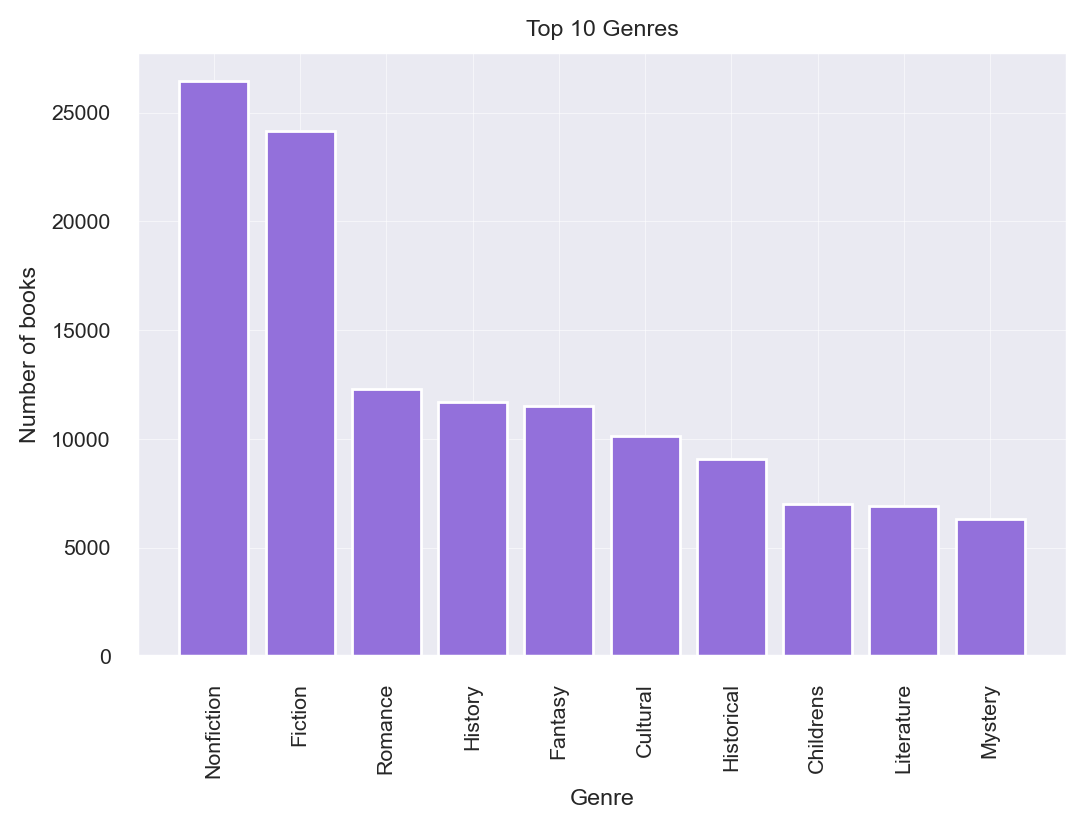

In [12]:
from collections import Counter

sns.set(style = 'darkgrid',font_scale=0.70,rc={"grid.linewidth": 0.2})
plt.figure(dpi=200)

top_10_genres_clean = dict(Counter(genres_clean).most_common(10))

plt.title("Top 10 Genres")
plt.xlabel("Genre")
plt.ylabel("Number of books")
plt.xticks(rotation=90)
plt.bar(list(top_10_genres_clean.keys()), list(top_10_genres_clean.values()), color='mediumpurple')
plt.show()

In [14]:
avg_ratings = []
avg_totalratings = []
avg_reviews = []
avg_pages = []

temp = clean_book.loc[~clean_book['genre'].isnull()]

for genre in top_10_genres_clean.keys():
    ratings = []
    totalratings = []
    reviews = []
    pages=[]
    for _, row in temp.iterrows():
        if genre in row['genre'].split(','):
            ratings.append(row['rating'])
            totalratings.append(row['rating_count'])
            reviews.append(row['review_count'])
            pages.append(row['page_count'])
            
    avg_ratings.append(np.nanmean(ratings))
    avg_totalratings.append(np.nanmean(totalratings))
    avg_reviews.append(np.nanmean(reviews))
    avg_pages.append(np.nanmean(pages))

In [15]:
genre_clean = pd.DataFrame(data=list(top_10_genres_clean.keys()), columns=["genre"])
genre_clean
genre_clean['Average Rating'] = avg_ratings
genre_clean['Average Total Rating'] = avg_totalratings
genre_clean['Average Number of Reviews'] = avg_reviews
genre_clean['Average Page Count'] = avg_pages
genre_clean

genre  Average Rating  Average Total Rating  \
0  Nonfiction        3.951663           1446.966765   
1     Fiction        3.861251           8196.913427   
2     Romance        3.846595           6729.526761   
3     History        3.930416           1292.210382   
4     Fantasy        3.902161           9283.395109   
5    Cultural        3.884445           2706.054743   
6  Historical        3.860989           5320.930661   
7   Childrens        3.920610           4404.437973   
8  Literature        3.869391           6235.885360   
9     Mystery        3.853315           8444.315155   

   Average Number of Reviews  Average Page Count  
0                 101.210110          309.291462  
1                 484.184646          281.001555  
2                 445.917683          288.274150  
3                  94.567929          343.402871  
4                 494.014569          278.928943  
5                 209.018676          297.049456  
6                 368.672629          331.109995  
7                 220.612562          124.899752  
8                 323.912070          319.922739  
9                 538.610970          313.495181

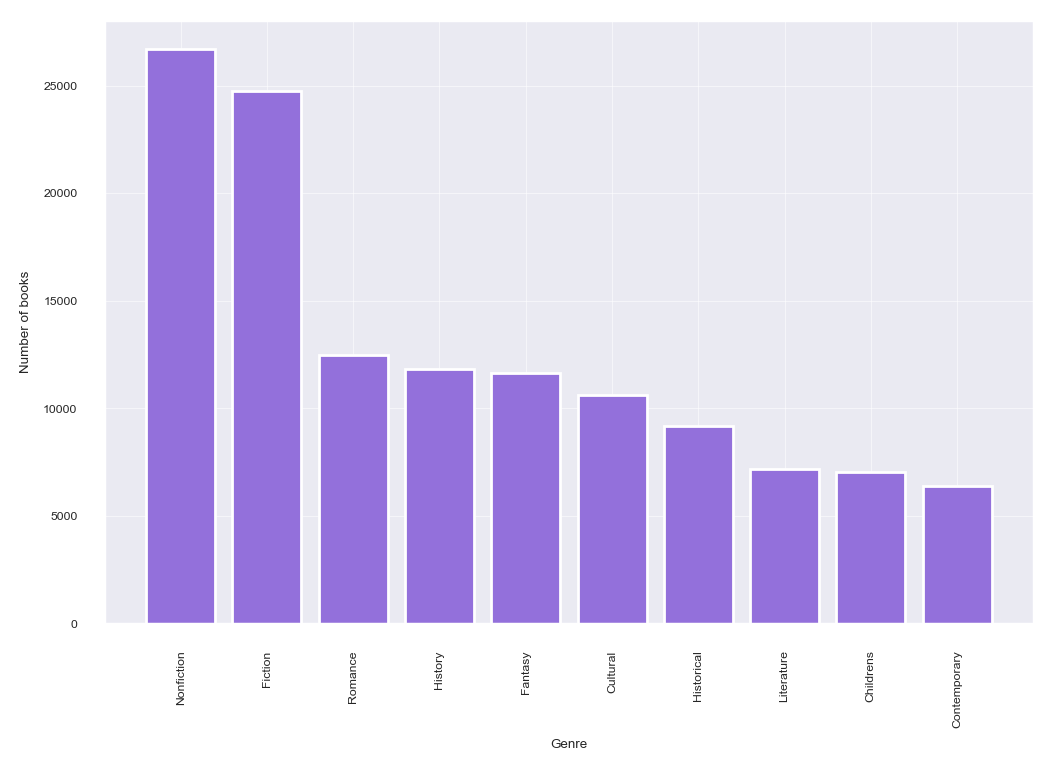

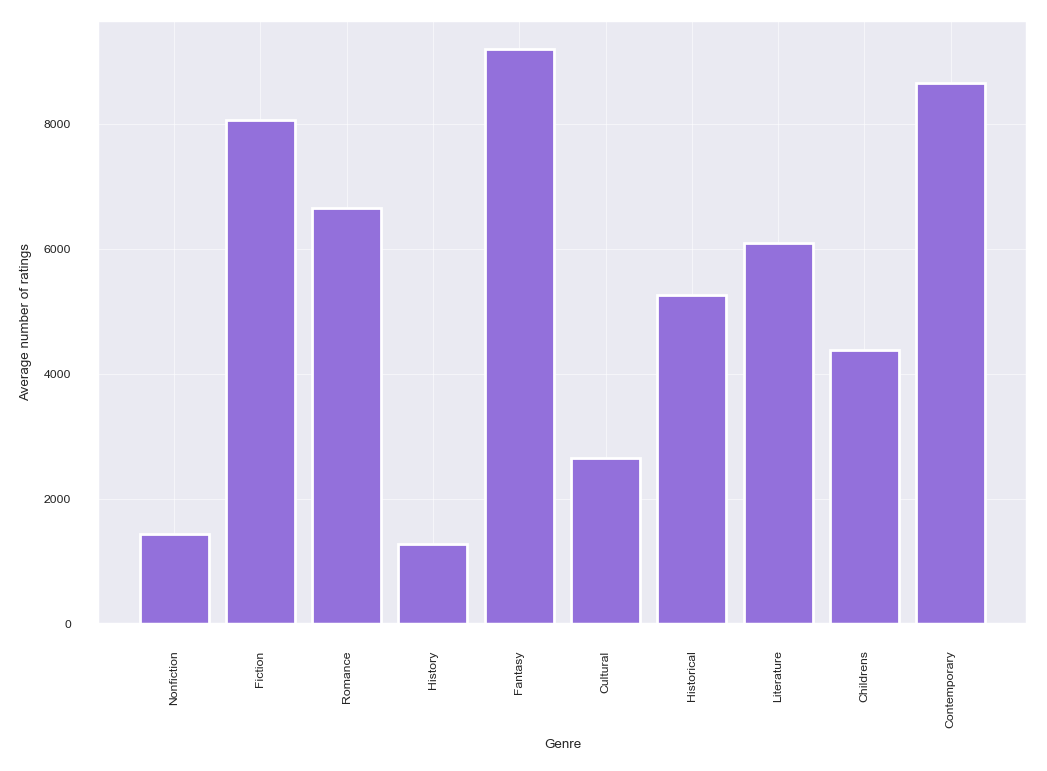

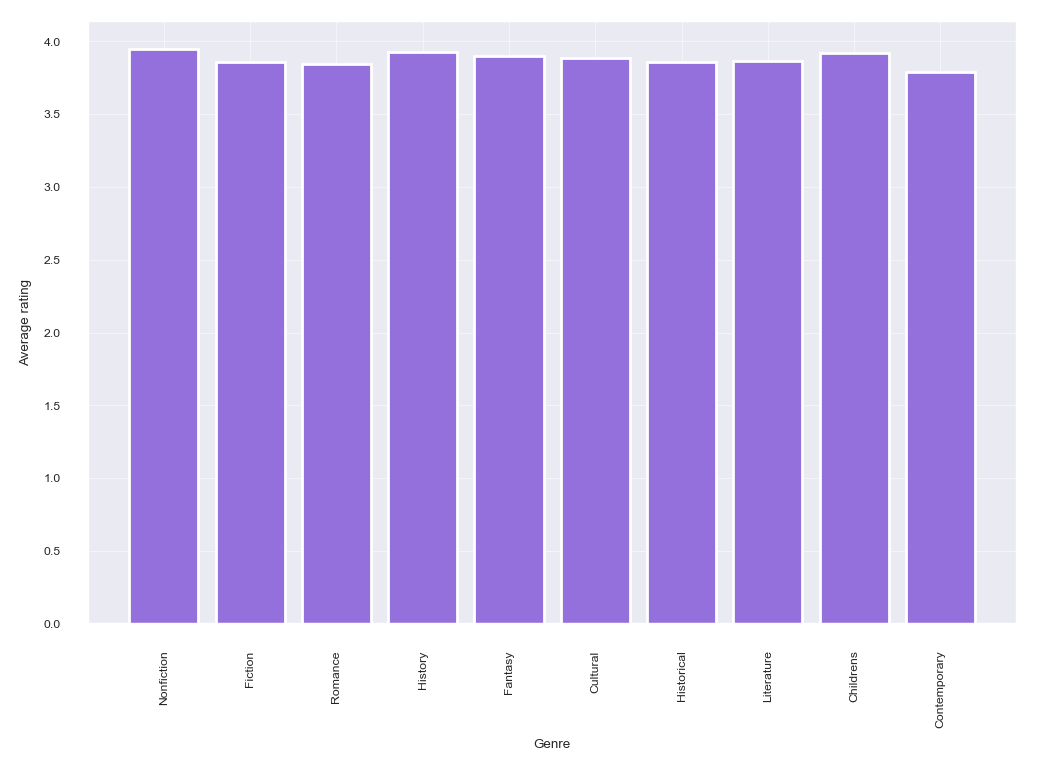

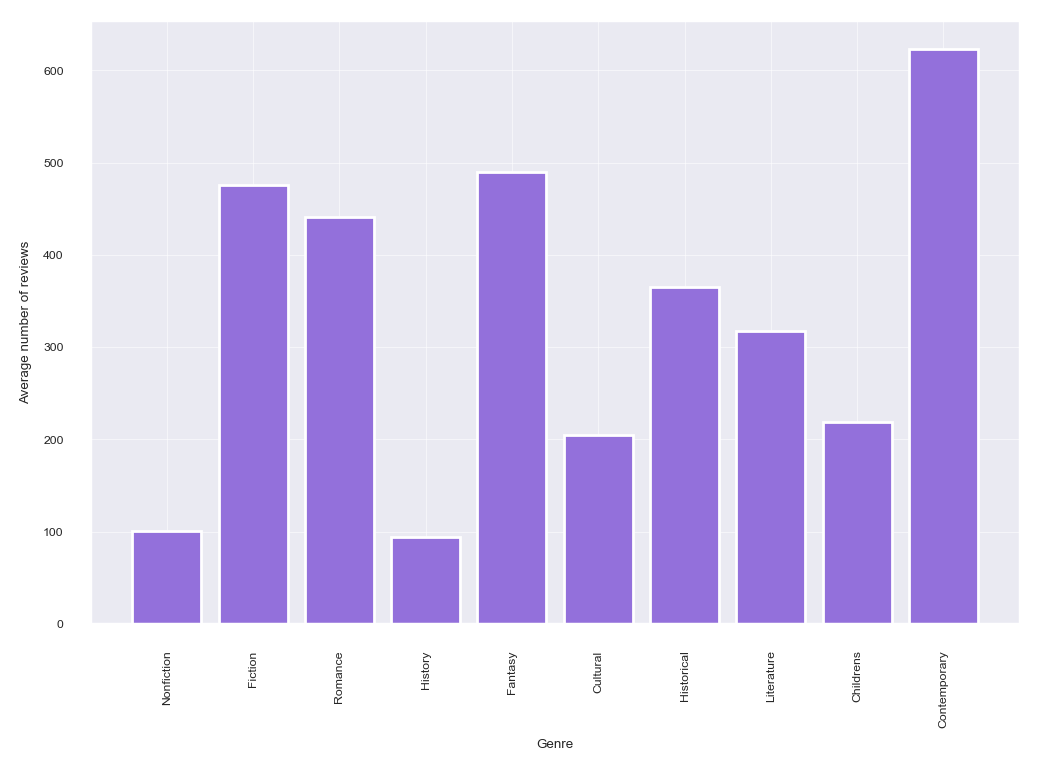

In [8]:
labels = ["Number of books", "Average number of ratings", "Average rating", "Average number of reviews"]
values = [list(top_10_genres_clean.values()), avg_totalratings, avg_ratings, avg_reviews]
for i in range(4):
    plt.figure(dpi=200)
    plt.xlabel("Genre")
    plt.ylabel(labels[i])
    plt.xticks(rotation=90)
    plt.bar(list(top_10_genres_clean.keys()), values[i], color='mediumpurple')
    plt.show()

In [16]:
top_10_bookformats_clean = dict(Counter(dict(clean_book.book_format.value_counts())).most_common(10))
top_10_bookformats_clean

{'Paperback': 42897,
 'Hardcover': 21862,
 'Mass Market Paperback': 2657,
 'Ebook': 2452,
 'Audiobook': 382,
 'Unknown Binding': 212,
 'Board Books': 193,
 'Spiral-bound': 94,
 'Library Binding': 43,
 'Trade Paperback': 32}

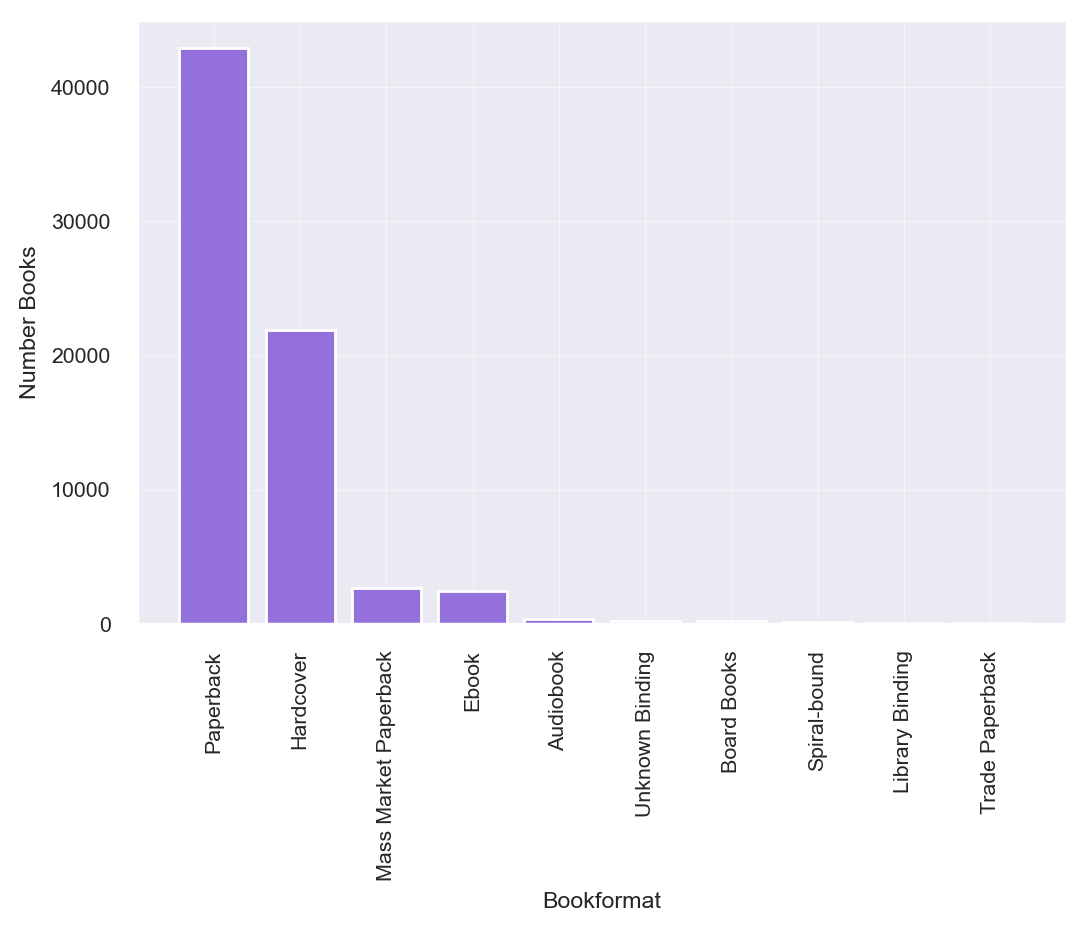

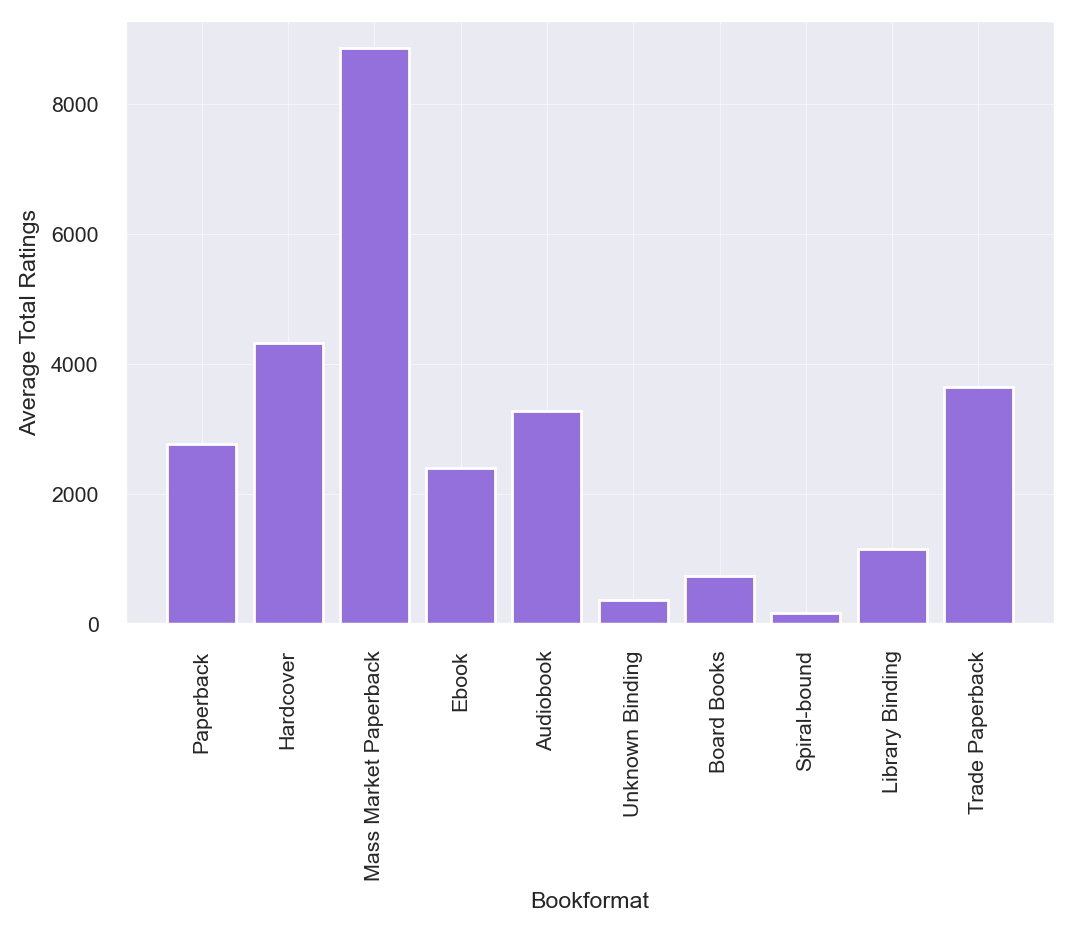

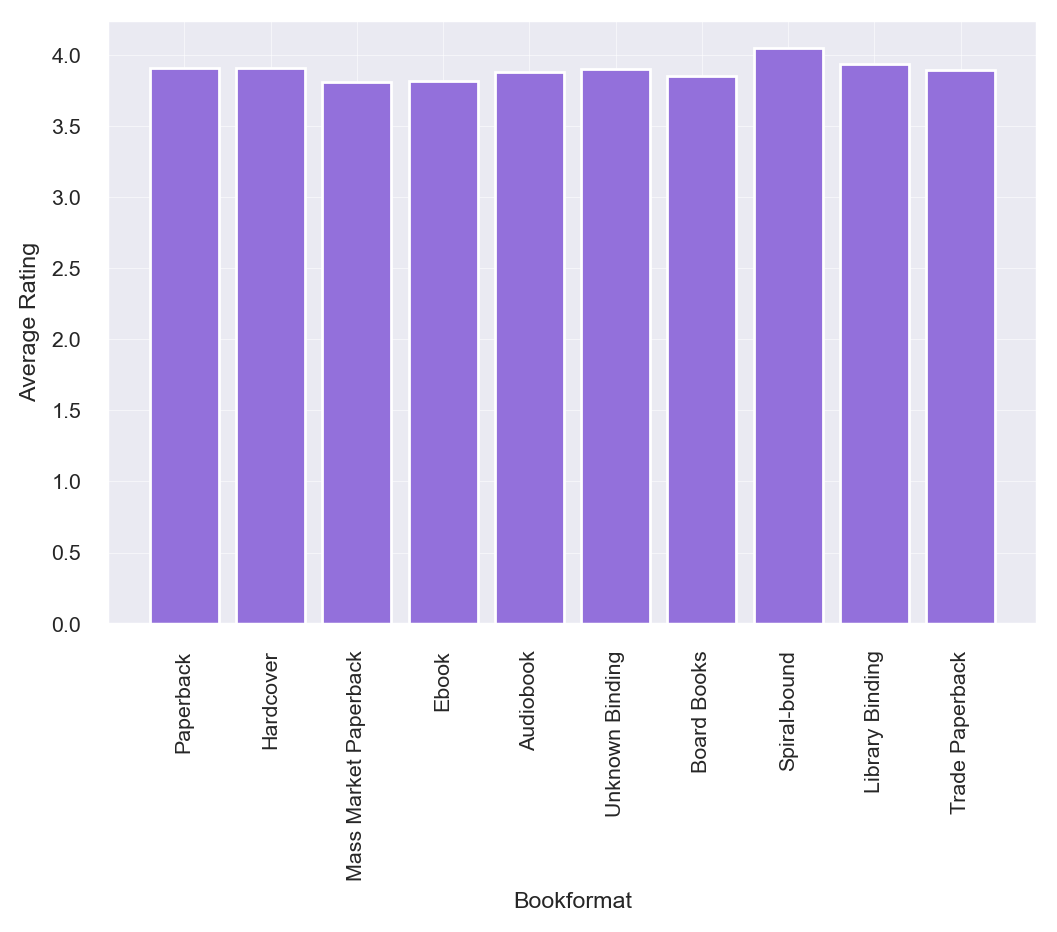

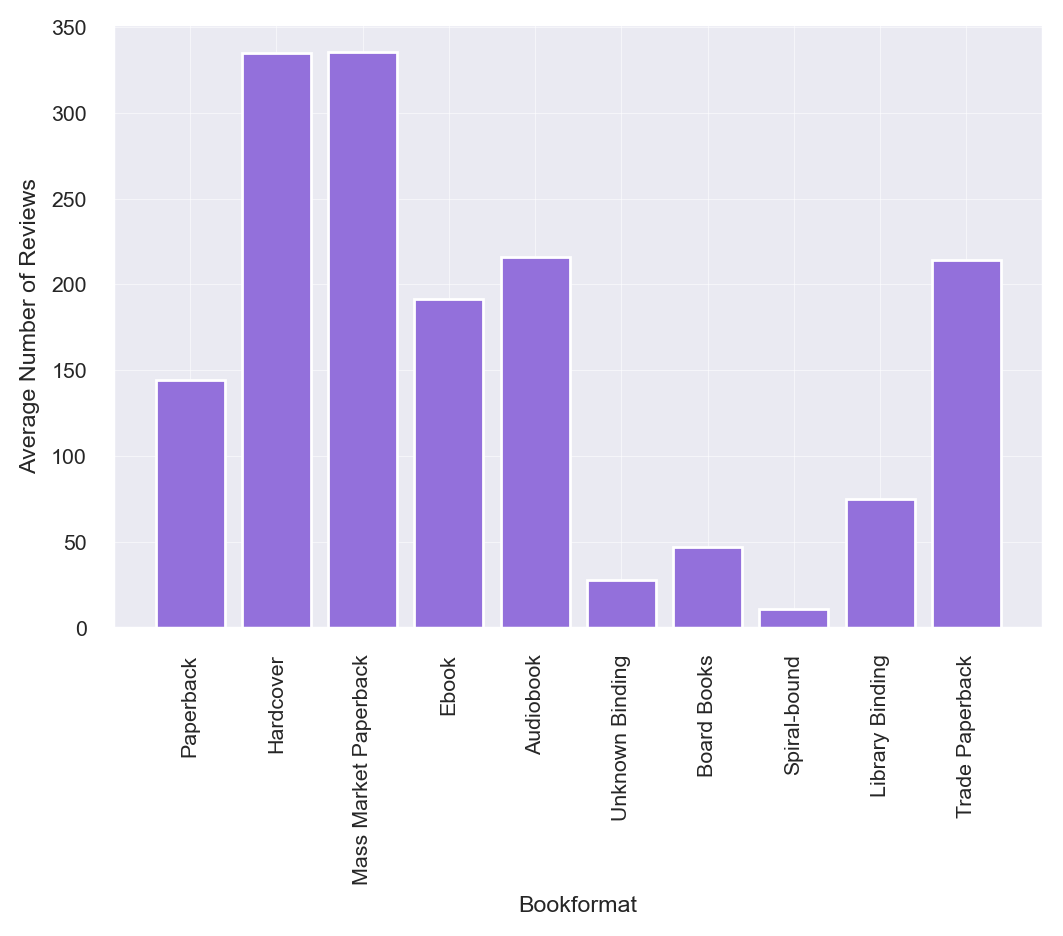

In [17]:
avg_ratings = []
avg_totalratings = []
avg_reviews = []

for i in top_10_bookformats_clean.keys():
    temp = clean_book.loc[clean_book['book_format'] == i]
    avg_ratings.append(temp['rating'].mean())
    avg_totalratings.append(temp['rating_count'].mean())
    avg_reviews.append(temp['review_count'].mean())



labels = ["Number Books", "Average Total Ratings", "Average Rating", "Average Number of Reviews"]
values = [list(top_10_bookformats_clean.values()), avg_totalratings, avg_ratings, avg_reviews]
for i in range(4):
    plt.figure(dpi=200)
    plt.xlabel("Bookformat")
    plt.ylabel(labels[i])
    plt.xticks(rotation=90)
    plt.bar(list(top_10_bookformats_clean.keys()), values[i], color='mediumpurple')
    plt.show()


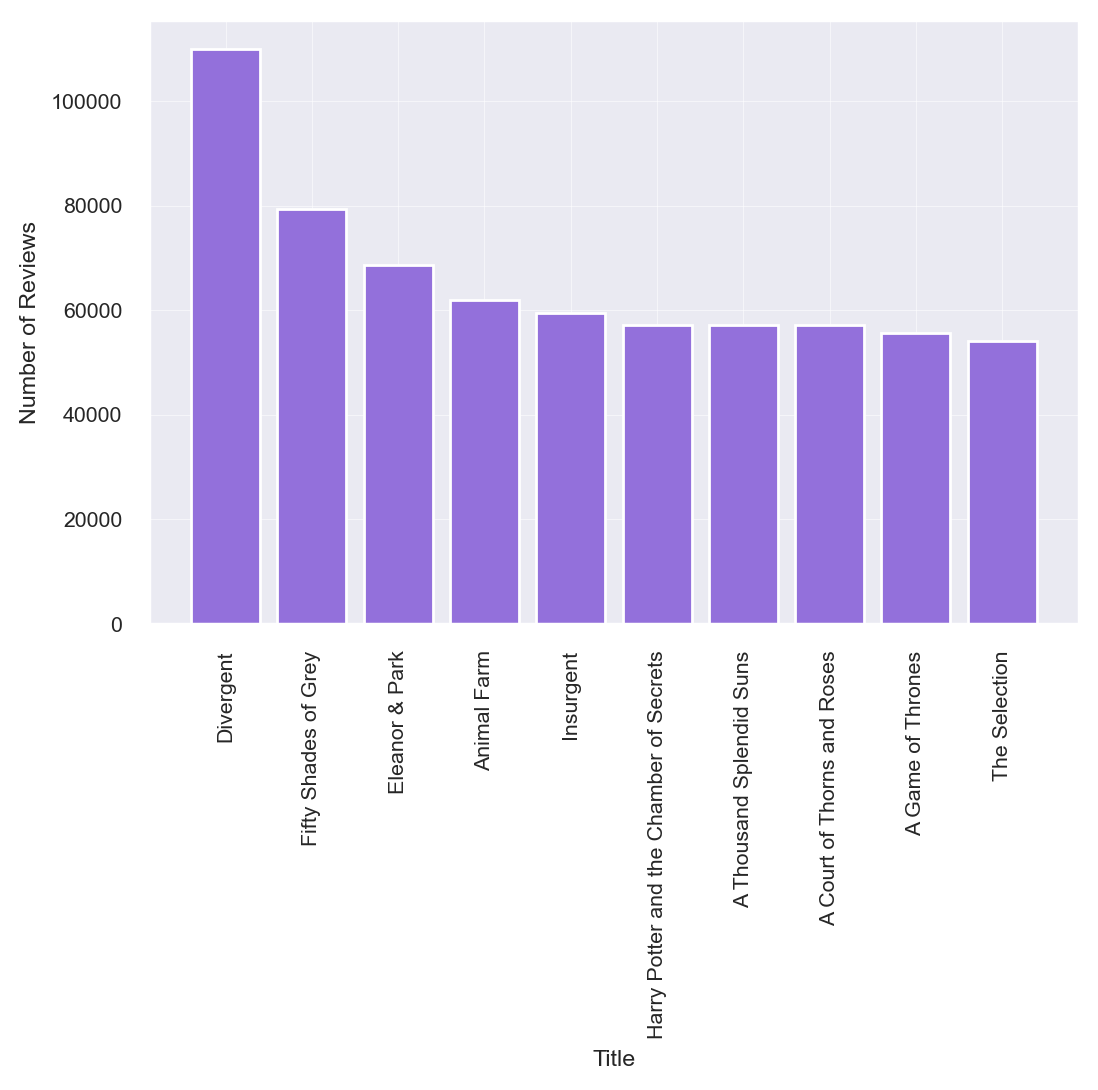

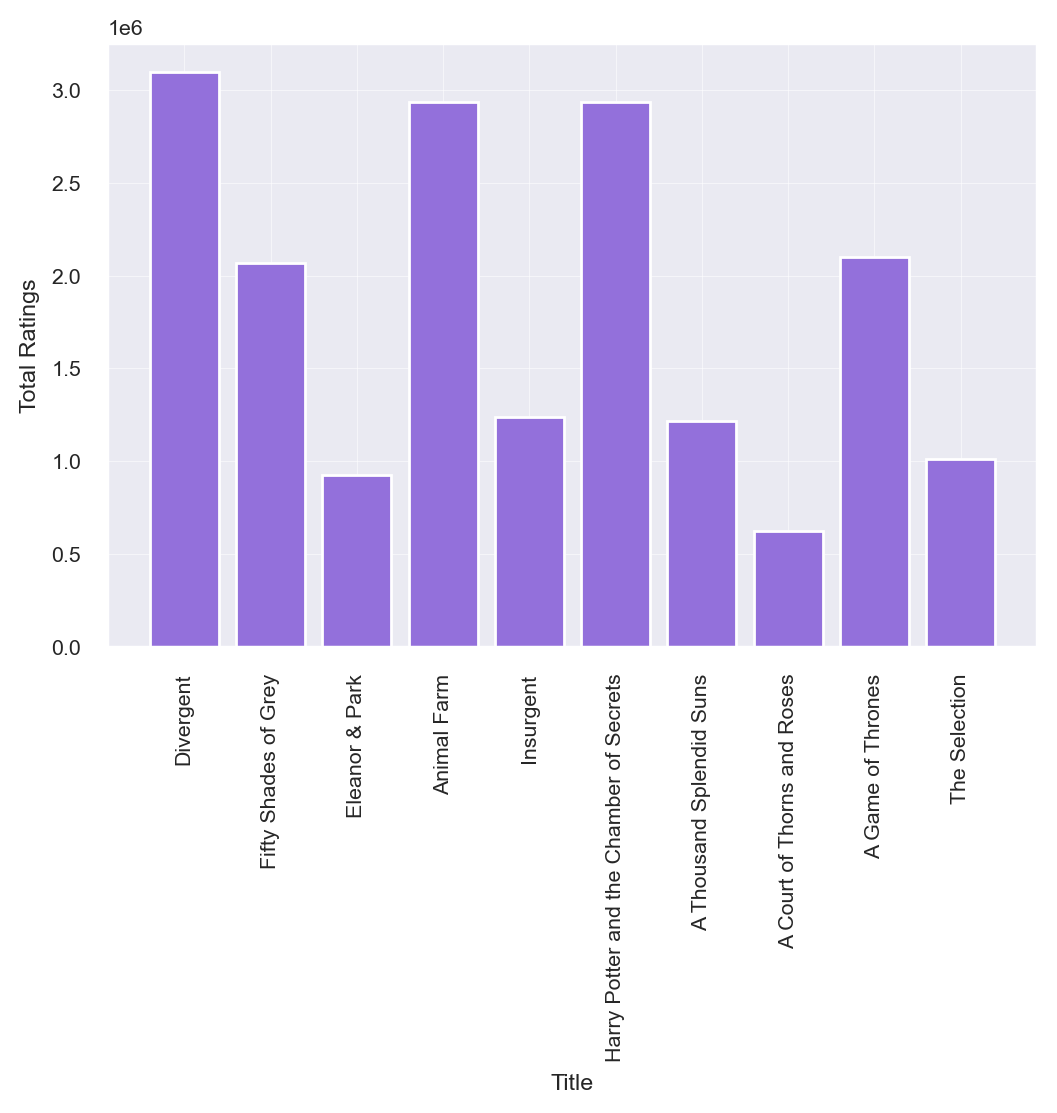

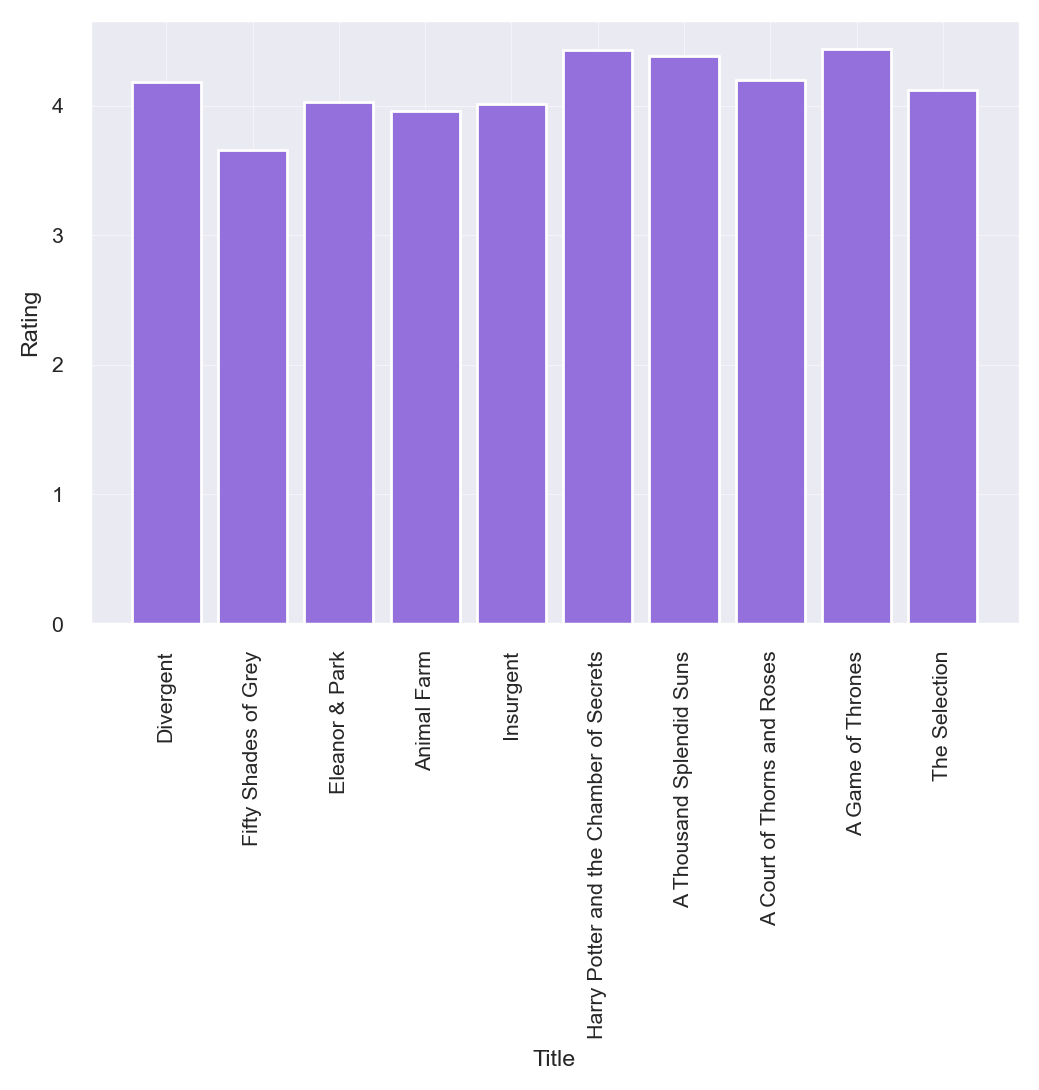

In [18]:
top_10_reviews_clean = clean_book.sort_values(by='review_count', ascending=False)[:10]
top_10_reviews_clean

book_title = []
rating = []
totalratings = []
reviews = []

for _, row in top_10_reviews_clean.iterrows():
    book_title.append(row['title'])
    rating.append(row['rating'])
    totalratings.append(row['rating_count'])
    reviews.append(row['review_count'])

labels = ["Number of Reviews", "Total Ratings", "Rating"]
values = [reviews, totalratings, rating]
for i in range(3):
    plt.figure(dpi=200)
    plt.xlabel("Title")
    plt.ylabel(labels[i])
    plt.xticks(rotation=90)
    plt.bar(book_title, values[i], color='mediumpurple')
    plt.show()

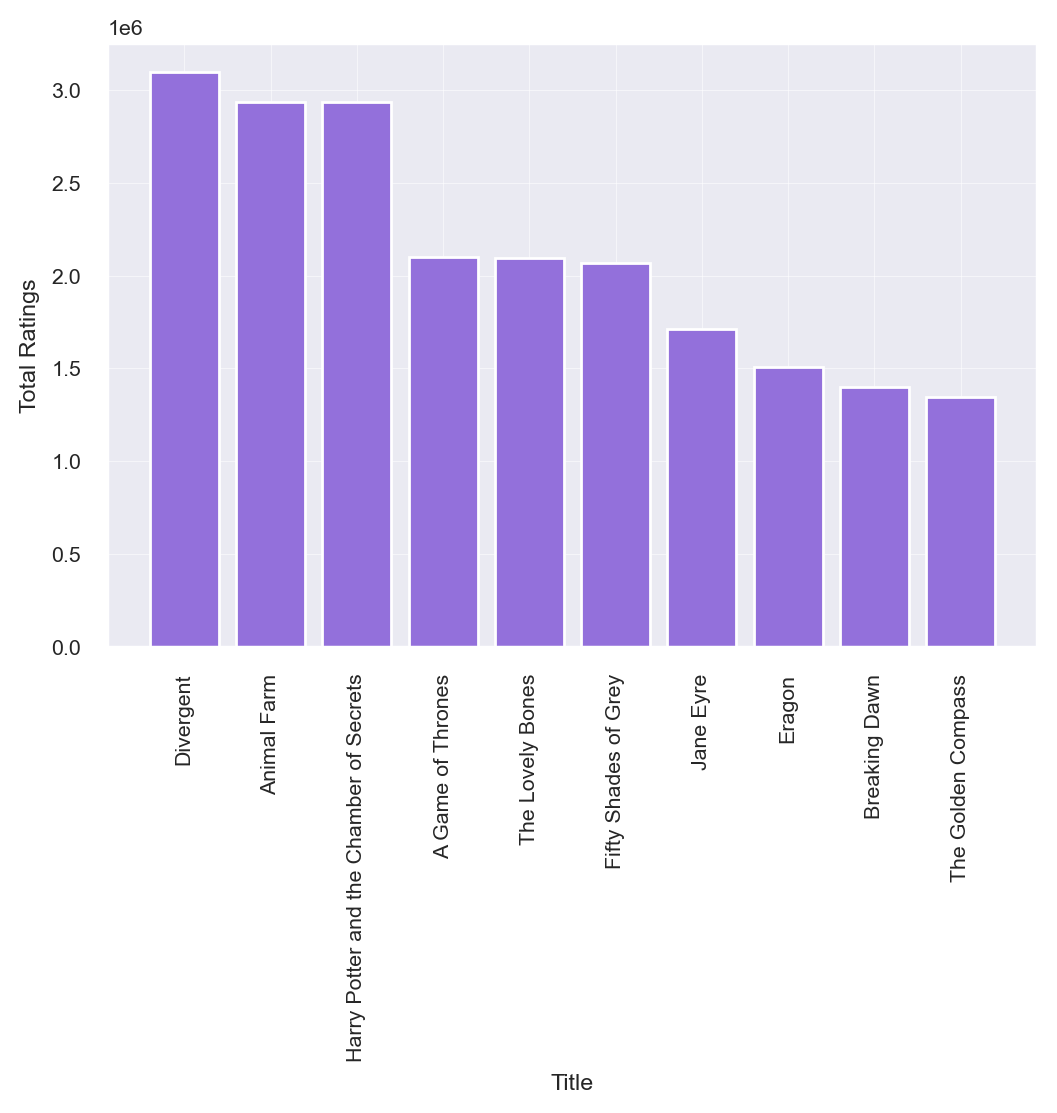

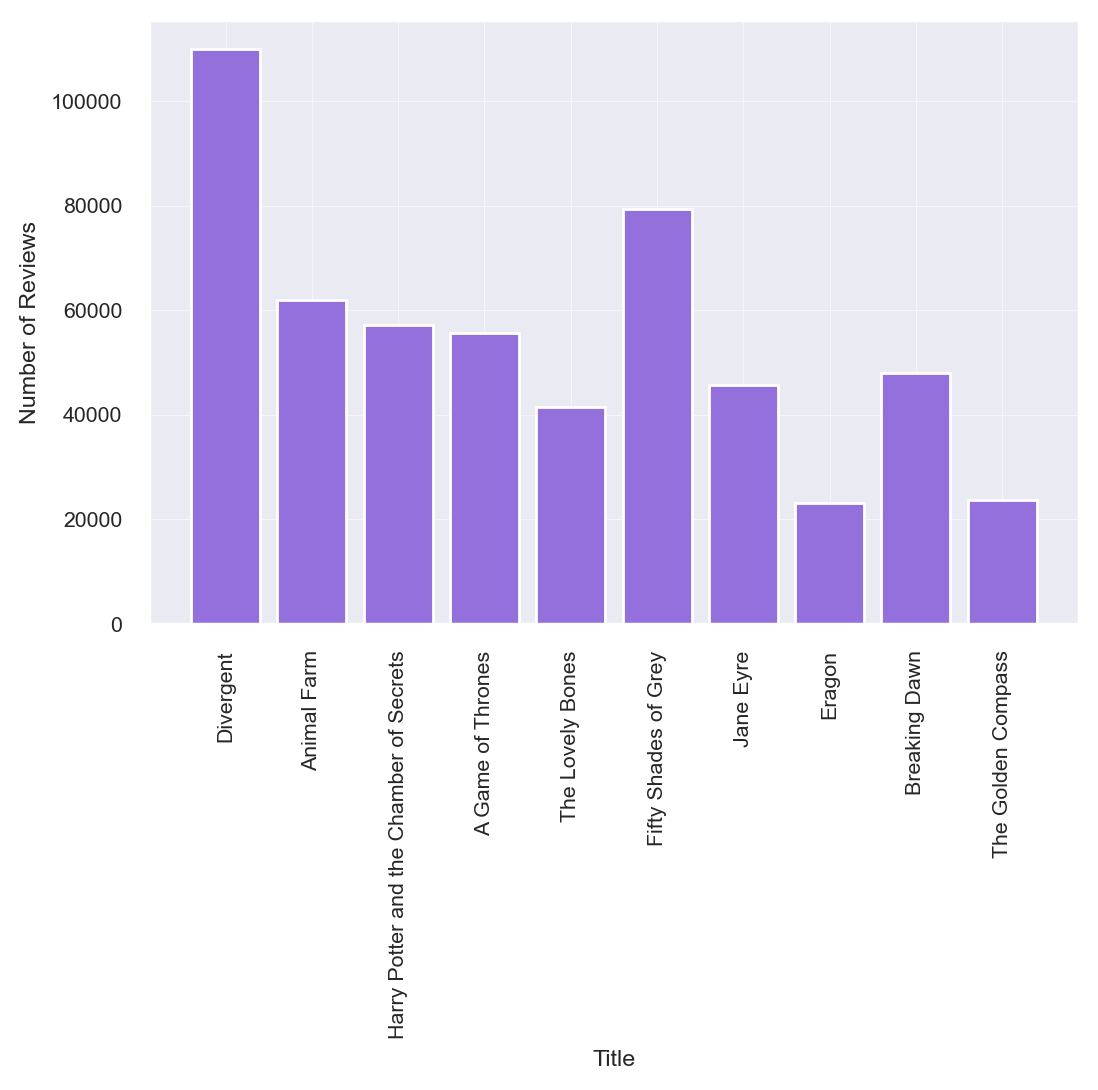

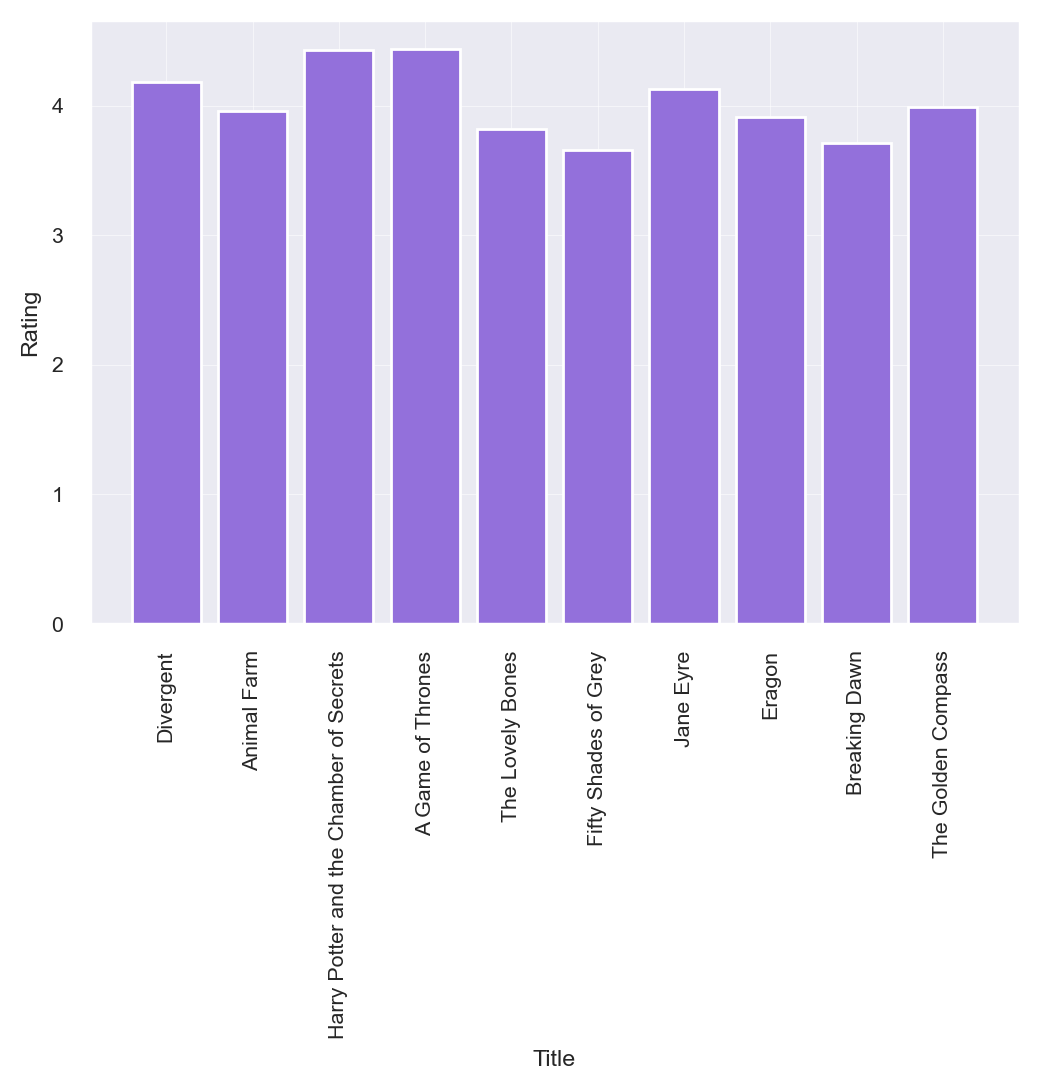

In [19]:
top_10_ratings_clean = clean_book.sort_values(by='rating_count', ascending=False)[:10]

book_title = []
rating = []
totalratings = []
reviews = []

for _, row in top_10_ratings_clean.iterrows():
    book_title.append(row['title'])
    rating.append(row['rating'])
    totalratings.append(row['rating_count'])
    reviews.append(row['review_count'])

labels = ["Total Ratings", "Number of Reviews", "Rating"]
values = [totalratings, reviews, rating]
for i in range(3):
    plt.figure(dpi=200)
    plt.xlabel("Title")
    plt.ylabel(labels[i])
    plt.xticks(rotation=90)
    plt.bar(book_title, values[i], color='mediumpurple')
    plt.show()

In [14]:
top_10_author_clean = dict(Counter(dict(clean_book.author.value_counts())).most_common(10))
top_10_author_clean

{'R.L. Stine': 70,
 'Elinor M. Brent-Dyer': 57,
 'Lynne Graham': 55,
 "Louis L'Amour": 52,
 'Bonnie Bryant': 48,
 'Agatha Christie': 48,
 'Harry Turtledove': 44,
 'Lynn Hagen': 40,
 'Jim Davis': 40,
 'Piers Anthony': 40}

In [20]:
avg_ratings = []
avg_totalratings = []
avg_reviews = []

for author in top_10_author_clean.keys():
    temp = clean_book.loc[clean_book['author'] == author]
    avg_ratings.append(temp['rating'].mean())
    avg_totalratings.append(temp['rating_count'].mean())
    avg_reviews.append(temp['review_count'].mean())

labels = ["Number of books", "Average Total of Ratings", "Average Rating", "Average Number of Reviews"]
values = [list(top_10_author_clean.values()), avg_totalratings, avg_ratings, avg_reviews]
for i in range(4):
    plt.figure(dpi=200)
    plt.xlabel("Author")
    plt.ylabel(labels[i])
    plt.xticks(rotation=90)
    plt.bar(list(top_10_author_clean.keys()), values[i], color='mediumpurple')
    plt.show()

NameError: name 'top_10_author_clean' is not defined

In [19]:
from collections import Counter
authors_clean= pd.DataFrame(list(dict(clean_book.author.value_counts())), columns=['Authors'])
authors_clean['Number of Books'] = list(dict(Counter(dict(clean_book.author.value_counts()))).values())
authors_clean

Authors  Number of Books
0                 R.L. Stine               70
1       Elinor M. Brent-Dyer               57
2               Lynne Graham               55
3              Louis L'Amour               52
4            Agatha Christie               48
...                      ...              ...
50191        Veronica Lawlor                1
50192            Ralph Moore                1
50193  Coco Irvine,Peg Meier                1
50194         Harriet Tuckey                1
50195    William A. Meninger                1

[50196 rows x 2 columns]

<AxesSubplot:xlabel='Number of Books', ylabel='Authors'>

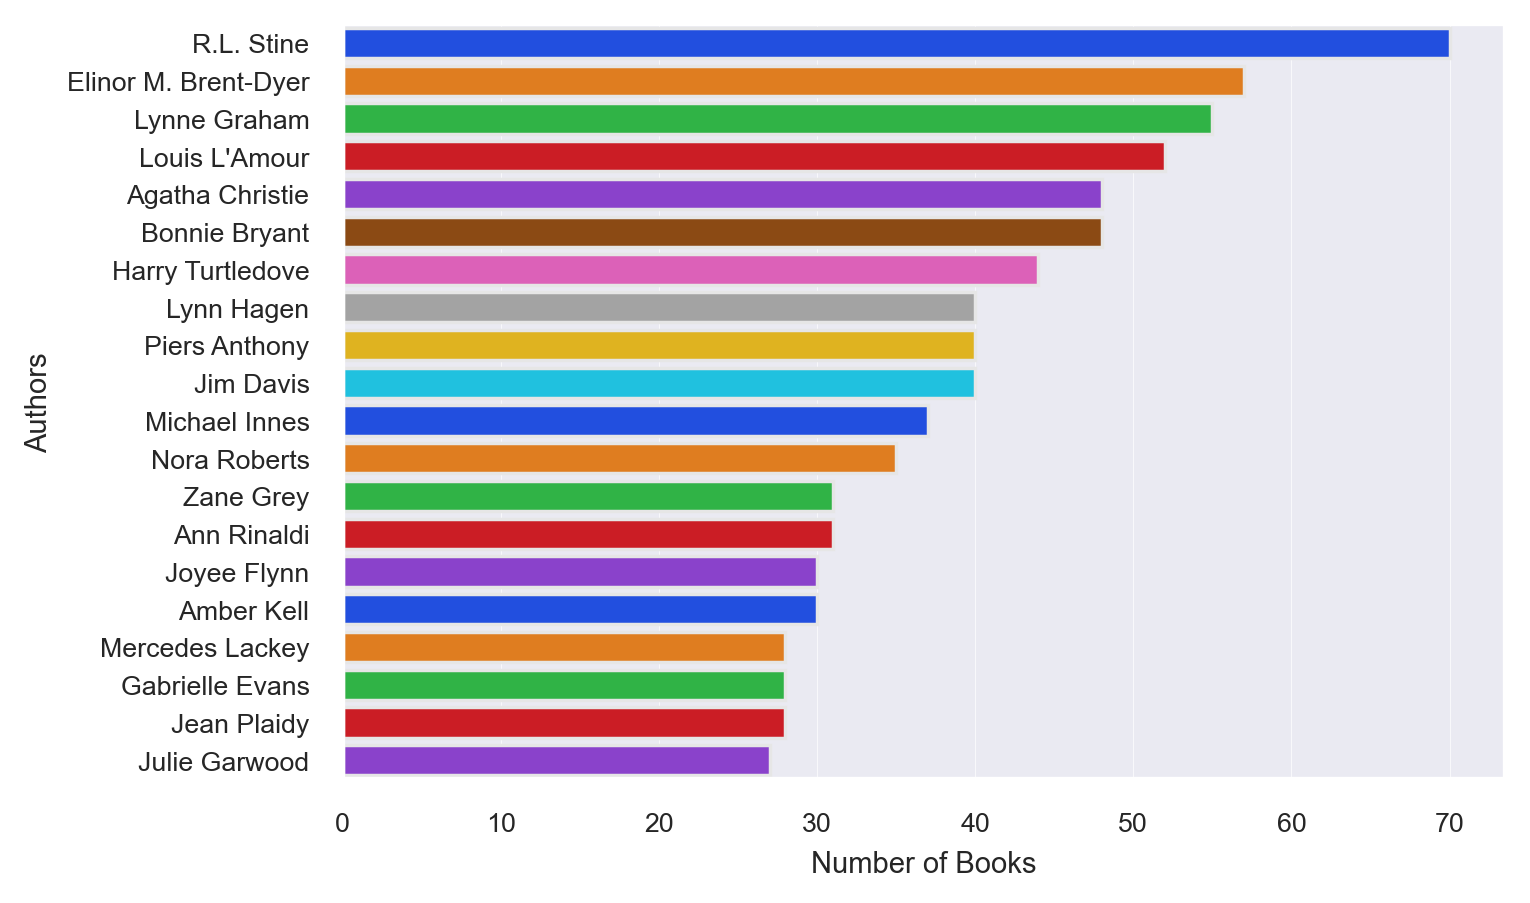

In [20]:
plt.figure(dpi=250)
palette = sns.color_palette("bright",15)
sns.set(style = 'darkgrid',font_scale=0.70,rc={"grid.linewidth": 0.2})

sns.barplot(y='Authors',x='Number of Books',
                palette=palette, 
                edgecolor=".9",
                data=authors_clean[:20] )

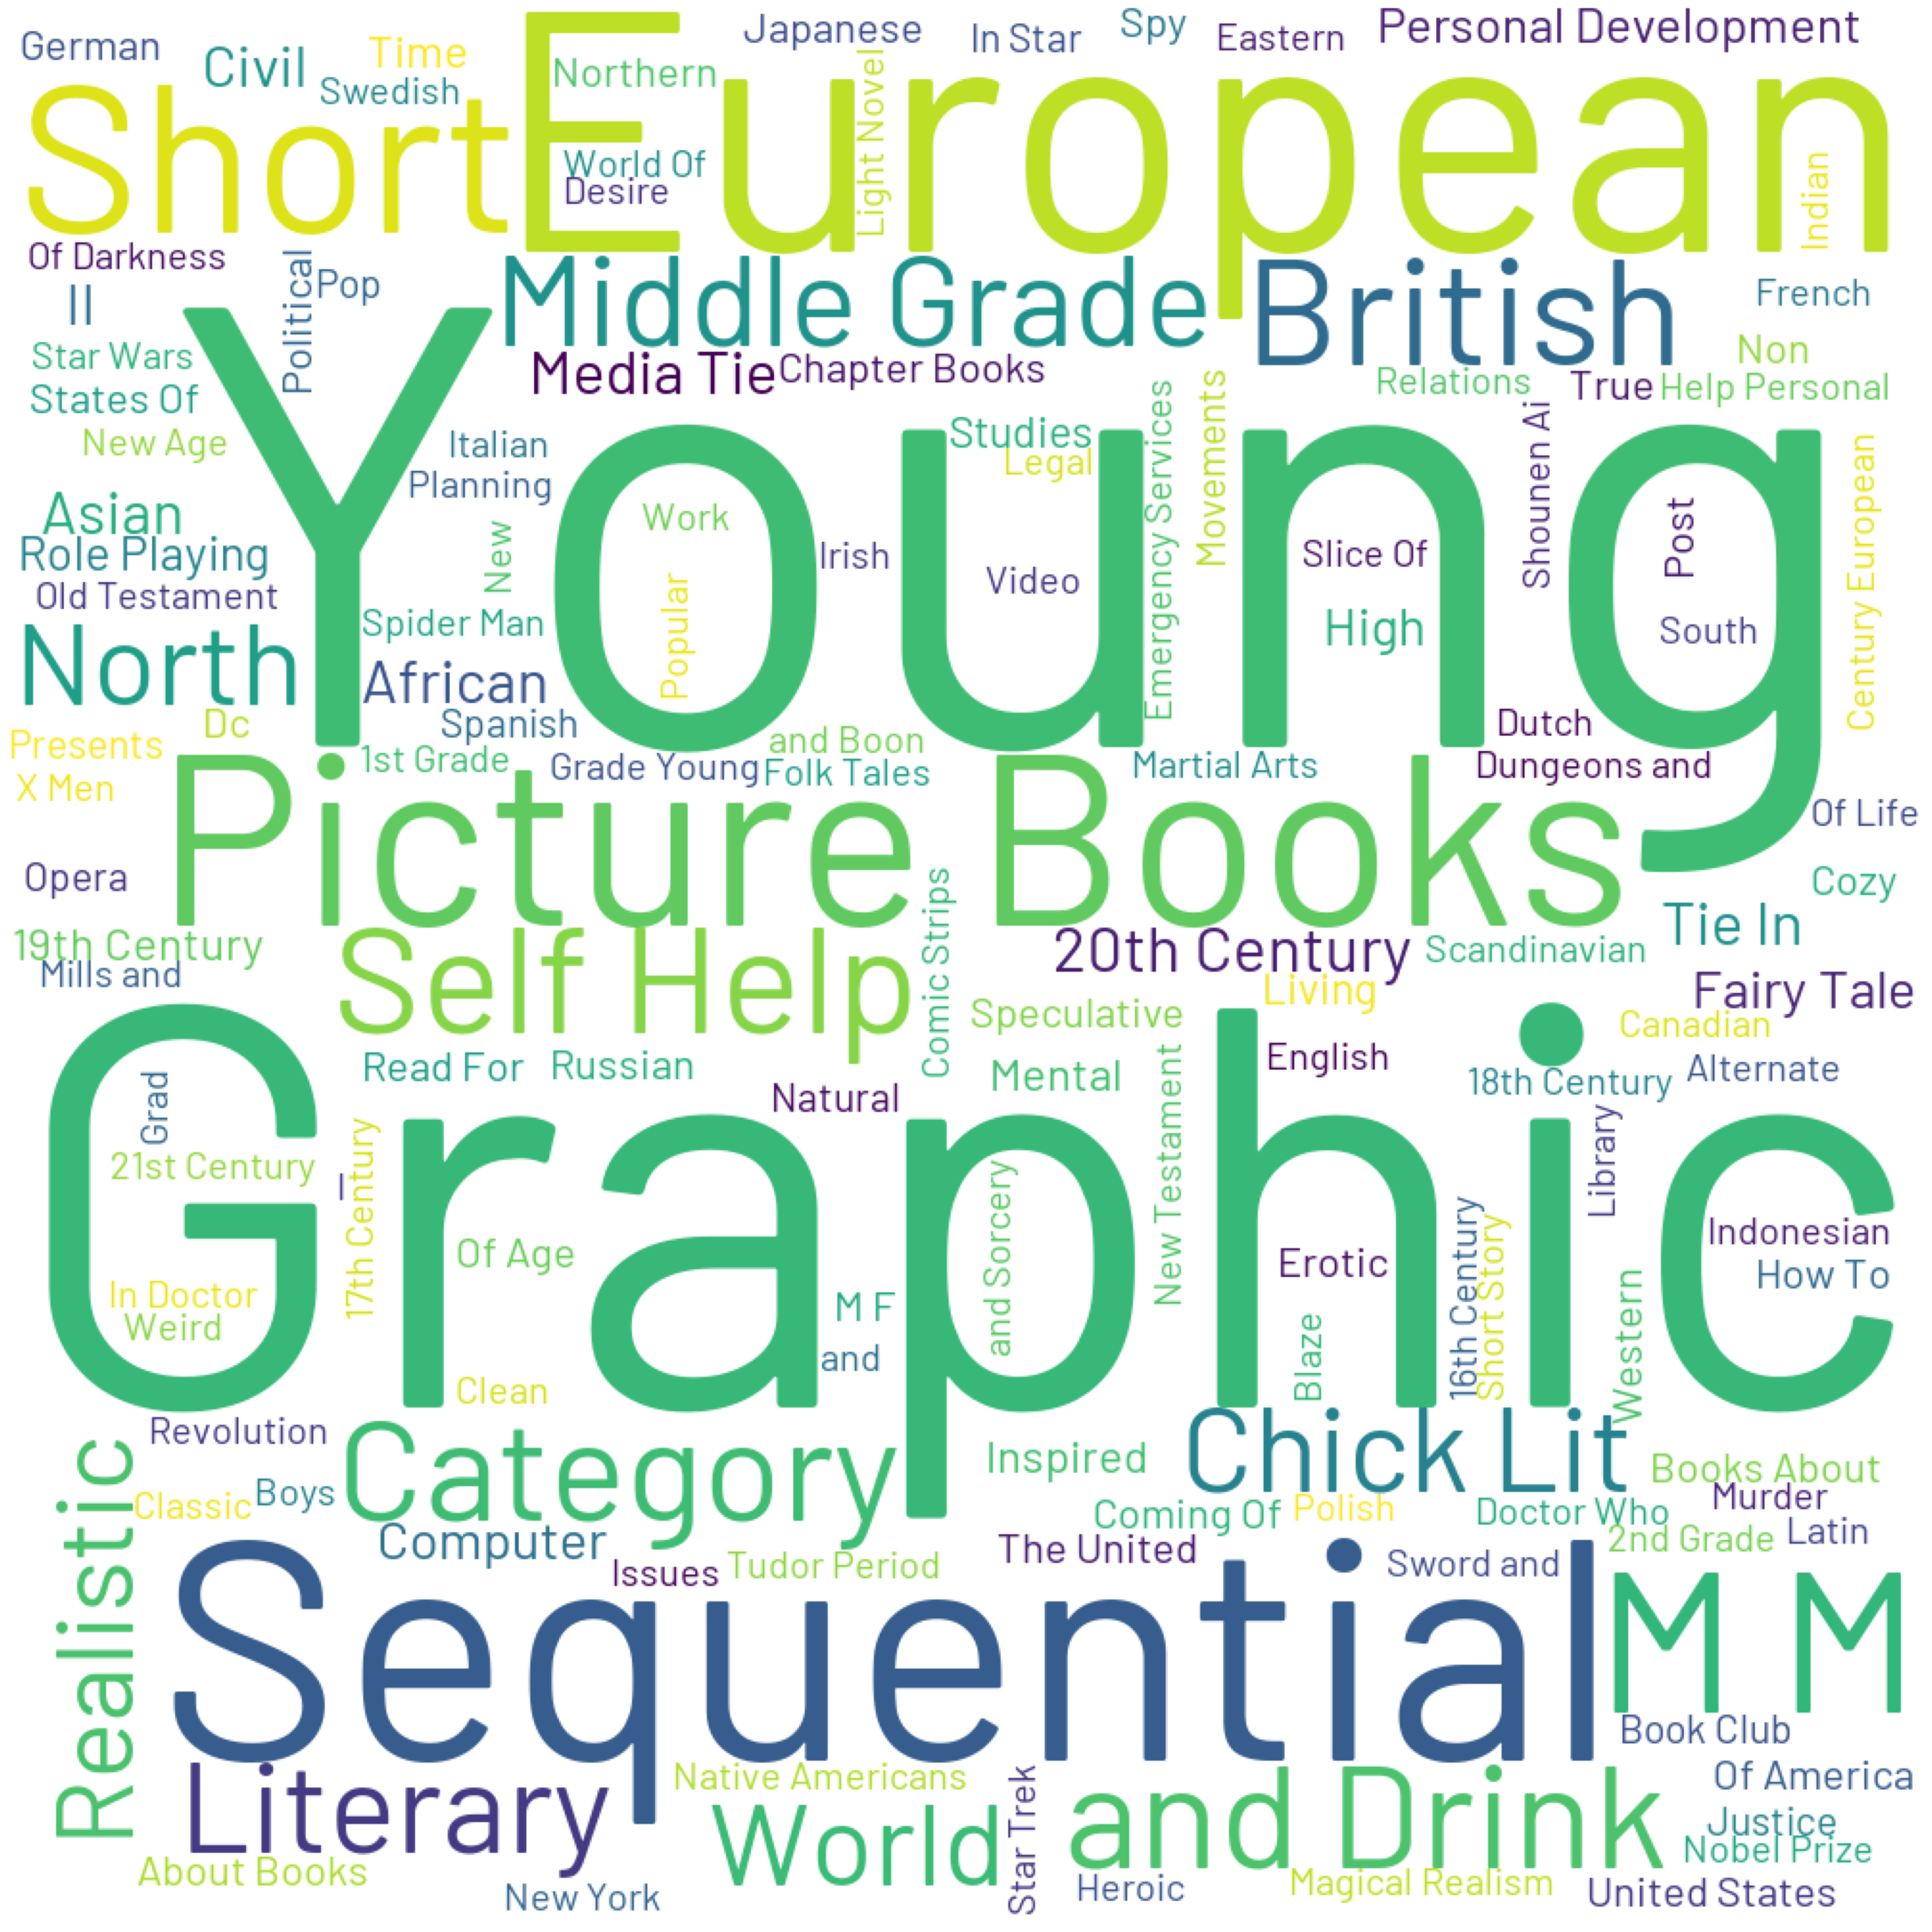

In [45]:
comment_words = ''
font_path = 'font/Barlow-Regular.ttf'

g_clean = clean_book.loc[~clean_book['genre'].isnull()]
for _, row in g_clean.iterrows():
    genre_list = row['genre'].split(',')
    for g in genre_list:
        g.replace(" ", "")
    comment_words += " ".join(genre_list) + " "

wordcloud = WordCloud(font_path=font_path, width = 1000, height = 1000,
                background_color ='white',
                stopwords = genres_clean.keys(),
                min_font_size = 20).generate(comment_words) #change font to ...
 
# plot the WordCloud image                      
plt.figure(figsize = (30, 30), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [20]:
clean_book = clean_book.loc[:, ~clean_book.columns.str.contains('^Unnamed')] #delete Unnamed columns pandas

clean_book.describe()

page_count        rating   review_count  rating_count
count  72249.000000  72249.000000   72249.000000  7.224900e+04
mean     277.005301      3.899851     208.850226  3.403266e+03
std      347.421574      0.364649    1413.575983  3.525319e+04
min        0.000000      0.000000       0.000000  0.000000e+00
25%      173.000000      3.700000       6.000000  5.500000e+01
50%      256.000000      3.920000      22.000000  2.140000e+02
75%      352.000000      4.130000      87.000000  9.950000e+02
max    70000.000000      5.000000  110042.000000  3.099689e+06

array([[<AxesSubplot:title={'center':'page_count'}>]], dtype=object)

<Figure size 1800x1200 with 0 Axes>

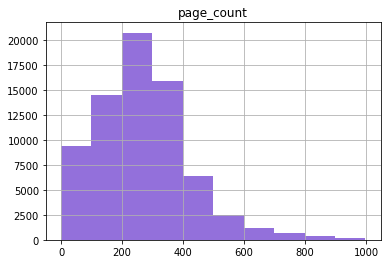

In [4]:
plt.figure(dpi=300)
clean_book.loc[clean_book['page_count'] < 1000].hist(column='page_count', color='mediumpurple')

In [23]:
top_10_price_clean = dict(Counter(dict(clean_book.price.value_counts())).most_common(10))
top_10_price_clean #top 10 prices ranges

{'15,20 €': 380,
 '25,36 €': 348,
 '10,16 €': 274,
 '20,28 €': 272,
 '17,00 €': 205,
 '13,16 €': 201,
 '17,23 €': 199,
 '18,00 €': 193,
 '16,21 €': 157,
 '25,42 €': 155}

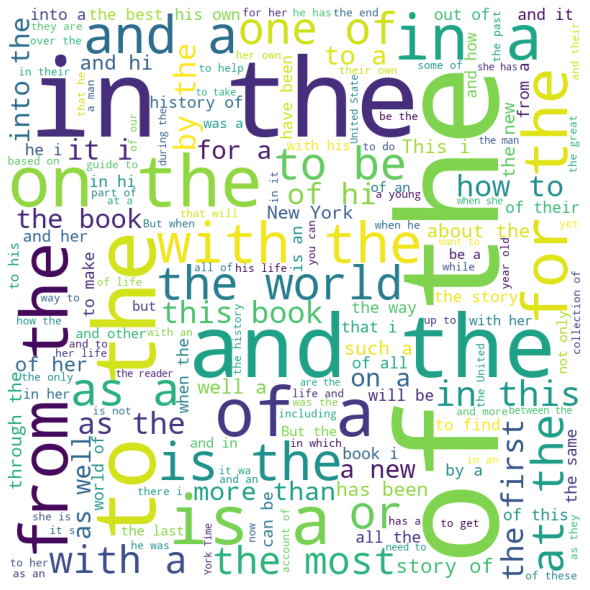

In [147]:
comment_words = ''

d_clean = clean_book.loc[~clean_book['description'].isnull()]
for _, row in d_clean.iterrows():
    des_list = row['description'].split(',')
    for d in des_list:
        d.replace(" ", "")
    comment_words += " ".join(des_list) + " "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = d_clean.keys(),
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

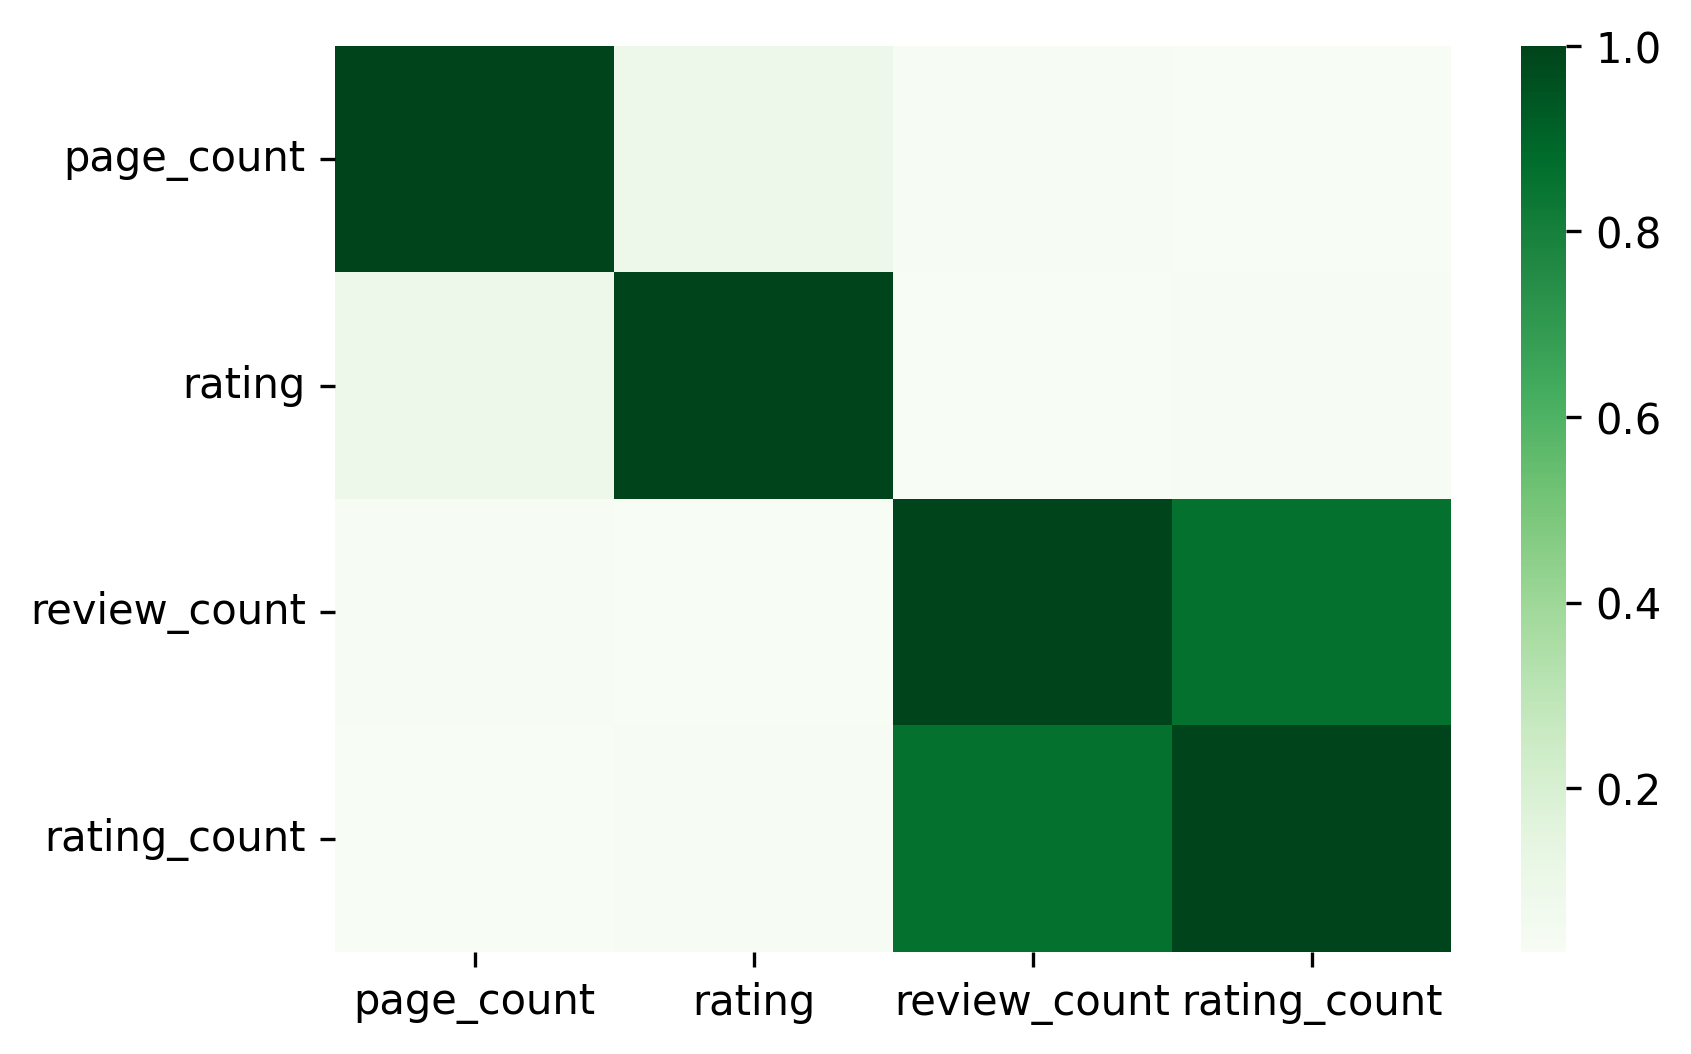

In [5]:
clean_book = clean_book.loc[:, ~clean_book.columns.str.contains('^Unnamed')] #delete Unnamed columns pandas
plt.figure(figsize=(6,4))
plt.figure(dpi=300)
sns.heatmap(clean_book.corr(),cmap='Greens',annot=False) #Greens

In [25]:
pages= pd.DataFrame(list(dict(clean_book.page_count.value_counts())), columns=['Number of Pages'])
pages['Number of Books'] = list(dict(Counter(dict(clean_book.page_count.value_counts()))).values())
pages

Number of Pages  Number of Books
0                   0             2174
1                 192             2125
2                 224             2077
3                  32             1998
4                 288             1974
...               ...              ...
1239             1370                1
1240              719                1
1241              975                1
1242             1039                1
1243             2341                1

[1244 rows x 2 columns]

In [26]:
top_10_pages = dict(Counter(dict(clean_book.page_count.value_counts())).most_common(10))
top_10_pages

{0: 2174,
 192: 2125,
 224: 2077,
 32: 1998,
 288: 1974,
 256: 1907,
 320: 1676,
 304: 1519,
 240: 1327,
 352: 1210}

In [27]:
pages= pd.DataFrame(list(dict(clean_book.page_count.value_counts())), columns=['Number of Pages'])
pages['Number of Books'] = list(dict(Counter(dict(clean_book.page_count.value_counts()))).values())
pages

Number of Pages  Number of Books
0                   0             2174
1                 192             2125
2                 224             2077
3                  32             1998
4                 288             1974
...               ...              ...
1239             1370                1
1240              719                1
1241              975                1
1242             1039                1
1243             2341                1

[1244 rows x 2 columns]

In [28]:
pd.crosstab(genre_clean["genre"], clean_book["review_count"])

review_count  1  2  3  5  6  7
genre                         
Childrens     0  0  1  0  0  0
Contemporary  0  0  1  0  0  0
Cultural      1  0  0  0  0  0
Fantasy       0  0  0  0  0  1
Fiction       0  0  0  0  1  0
Historical    0  1  0  0  0  0
History       1  0  0  0  0  0
Literature    0  0  0  0  0  1
Nonfiction    0  0  0  1  0  0
Romance       0  1  0  0  0  0

In [26]:
def str_to_float(a):
    a=a[:-2]
    a= a.replace(',','.')
    return float(a)

In [22]:
price_range={'0-10 €':0, '10-15 €':0, '15-20 €':0, '20-25 €':0, '25-30 €':0, '30-40 €':0, '40-50 €':0, '50-60 €':0, '60-100 €':0, '100-300 €':0}

In [23]:
prices= dict(clean_book.price.value_counts())

In [27]:
for i in prices.keys():
    number=str_to_float(i)
    if number<10:
        price_range['0-10 €']+=dict(clean_book.price.value_counts()).get(i)
    elif 10<=number<15:
        price_range['10-15 €']+=dict(clean_book.price.value_counts()).get(i)
    elif 15<=number<20:
        price_range['15-20 €']+=dict(clean_book.price.value_counts()).get(i)
    elif 20<=number<25:
        price_range['20-25 €']+=dict(clean_book.price.value_counts()).get(i)
    elif 25<=number<30:
        price_range['25-30 €']+=dict(clean_book.price.value_counts()).get(i)
    elif 30<=number<40:
        price_range['30-40 €']+=dict(clean_book.price.value_counts()).get(i)
    elif 40<=number<50:
        price_range['40-50 €']+=dict(clean_book.price.value_counts()).get(i)
    elif 50<=number<60:
        price_range['50-60 €']+=dict(clean_book.price.value_counts()).get(i)
    elif 60<=number<100:
        price_range['60-100 €']+=dict(clean_book.price.value_counts()).get(i)
    else:
        price_range['100-300 €']+=dict(clean_book.price.value_counts()).get(i)

In [28]:
range_price = pd.DataFrame(data=list(price_range.keys()), columns=["Price Range"])
range_price['Number of Books'] = list(price_range.values())
range_price

Price Range  Number of Books
0      0-10 €             2604
1     10-15 €             5254
2     15-20 €             7035
3     20-25 €             4140
4     25-30 €             3315
5     30-40 €             2219
6     40-50 €              934
7     50-60 €              504
8    60-100 €              683
9   100-300 €              394

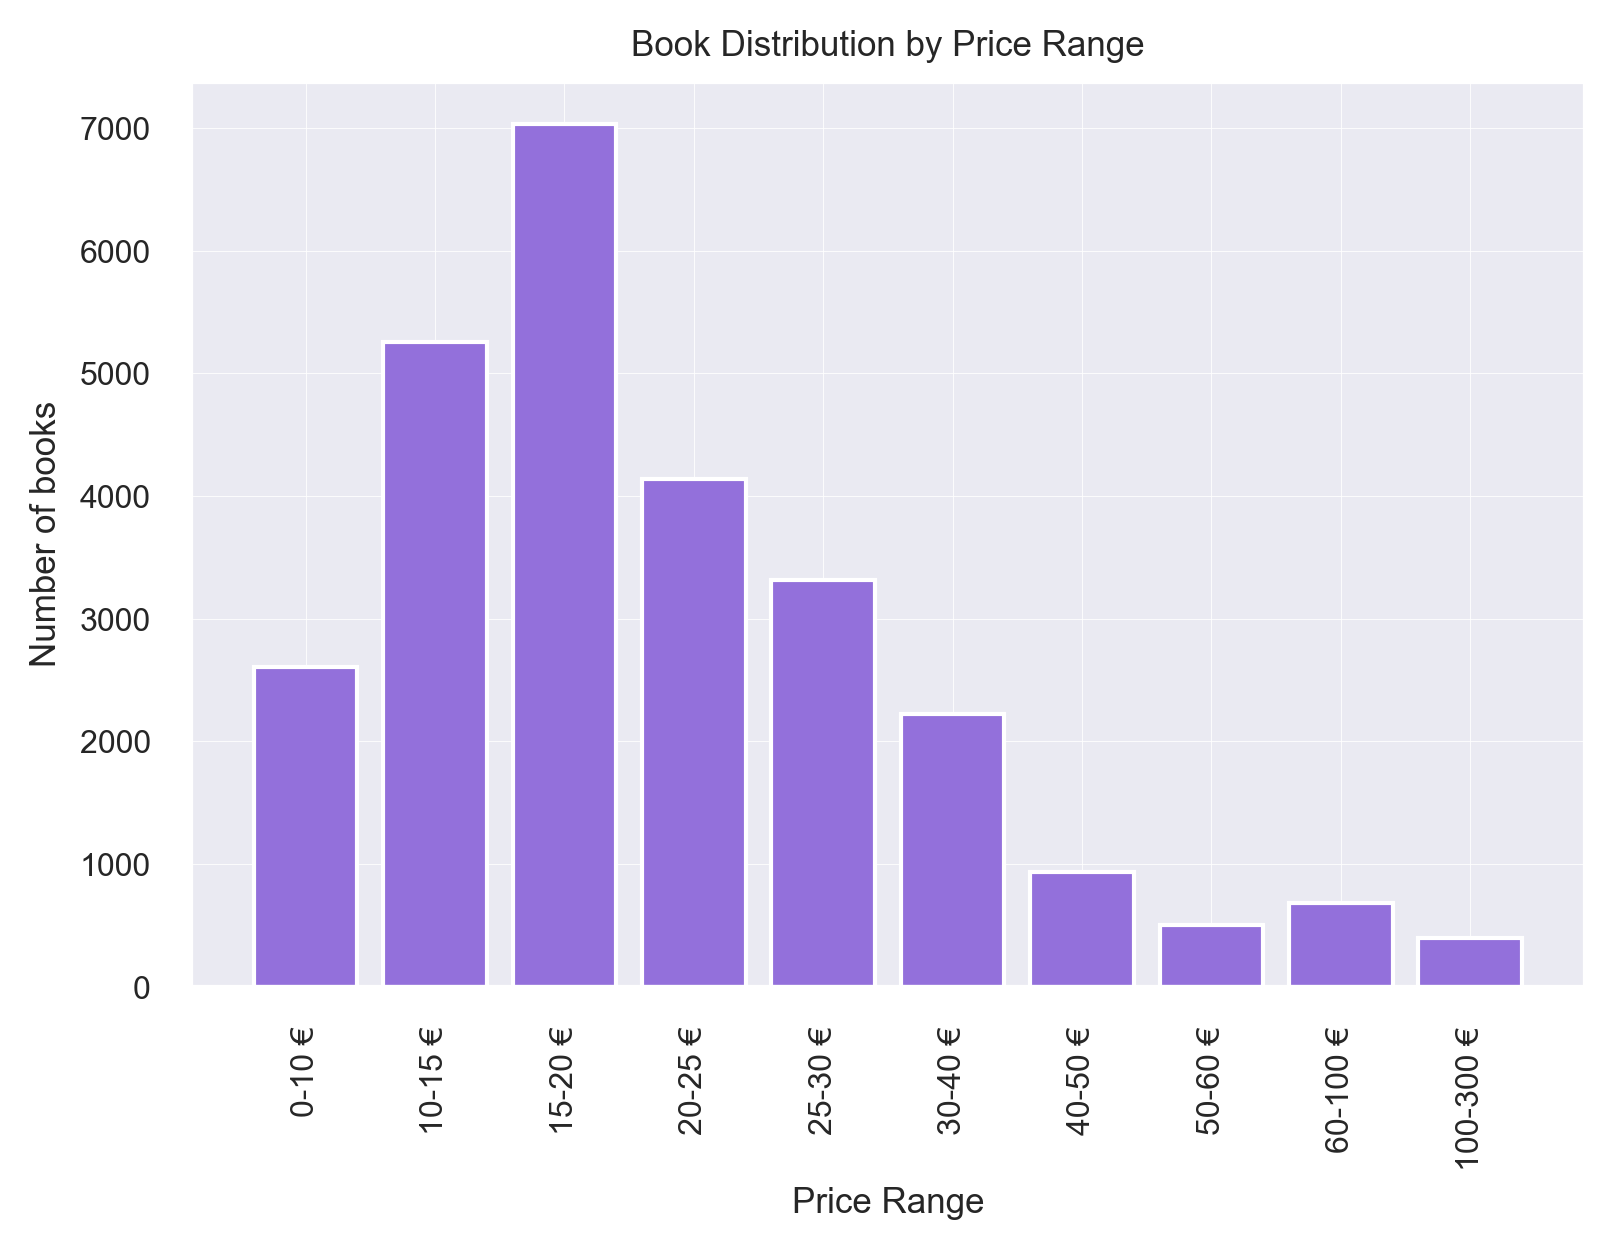

In [29]:
sns.set(style = 'darkgrid',font_scale=0.70,rc={"grid.linewidth": 0.2})
plt.figure(dpi=300)

plt.title("Book Distribution by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Number of books")
plt.xticks(rotation=90)
plt.bar(list(price_range.keys()), list(price_range.values()), color='mediumpurple')
plt.show()

In [30]:
pages= dict(clean_book.page_count.value_counts())

In [31]:
page_range={'0-100':0, '100-200':0, '200-300':0, '300-400':0, '400-500':0, '500-600':0, '600-700':0, '700-800':0, '800-70000':0}

In [32]:
for i in pages.keys():
    if i<100:
        page_range['0-100']+=dict(clean_book.page_count.value_counts()).get(i)
    elif 100<=i<200:
        page_range['100-200']+=dict(clean_book.page_count.value_counts()).get(i)
    elif 200<=i<300:
        page_range['200-300']+=dict(clean_book.page_count.value_counts()).get(i)
    elif 300<=i<400:
        page_range['300-400']+=dict(clean_book.page_count.value_counts()).get(i)
    elif 400<=i<500:
        page_range['400-500']+=dict(clean_book.page_count.value_counts()).get(i)
    elif 500<=i<600:
        page_range['500-600']+=dict(clean_book.page_count.value_counts()).get(i)
    elif 600<=i<700:
        page_range['600-700']+=dict(clean_book.page_count.value_counts()).get(i)
    elif 700<=i<800:
        page_range['700-800']+=dict(clean_book.page_count.value_counts()).get(i)
    else:
        page_range['800-70000']+=dict(clean_book.page_count.value_counts()).get(i)

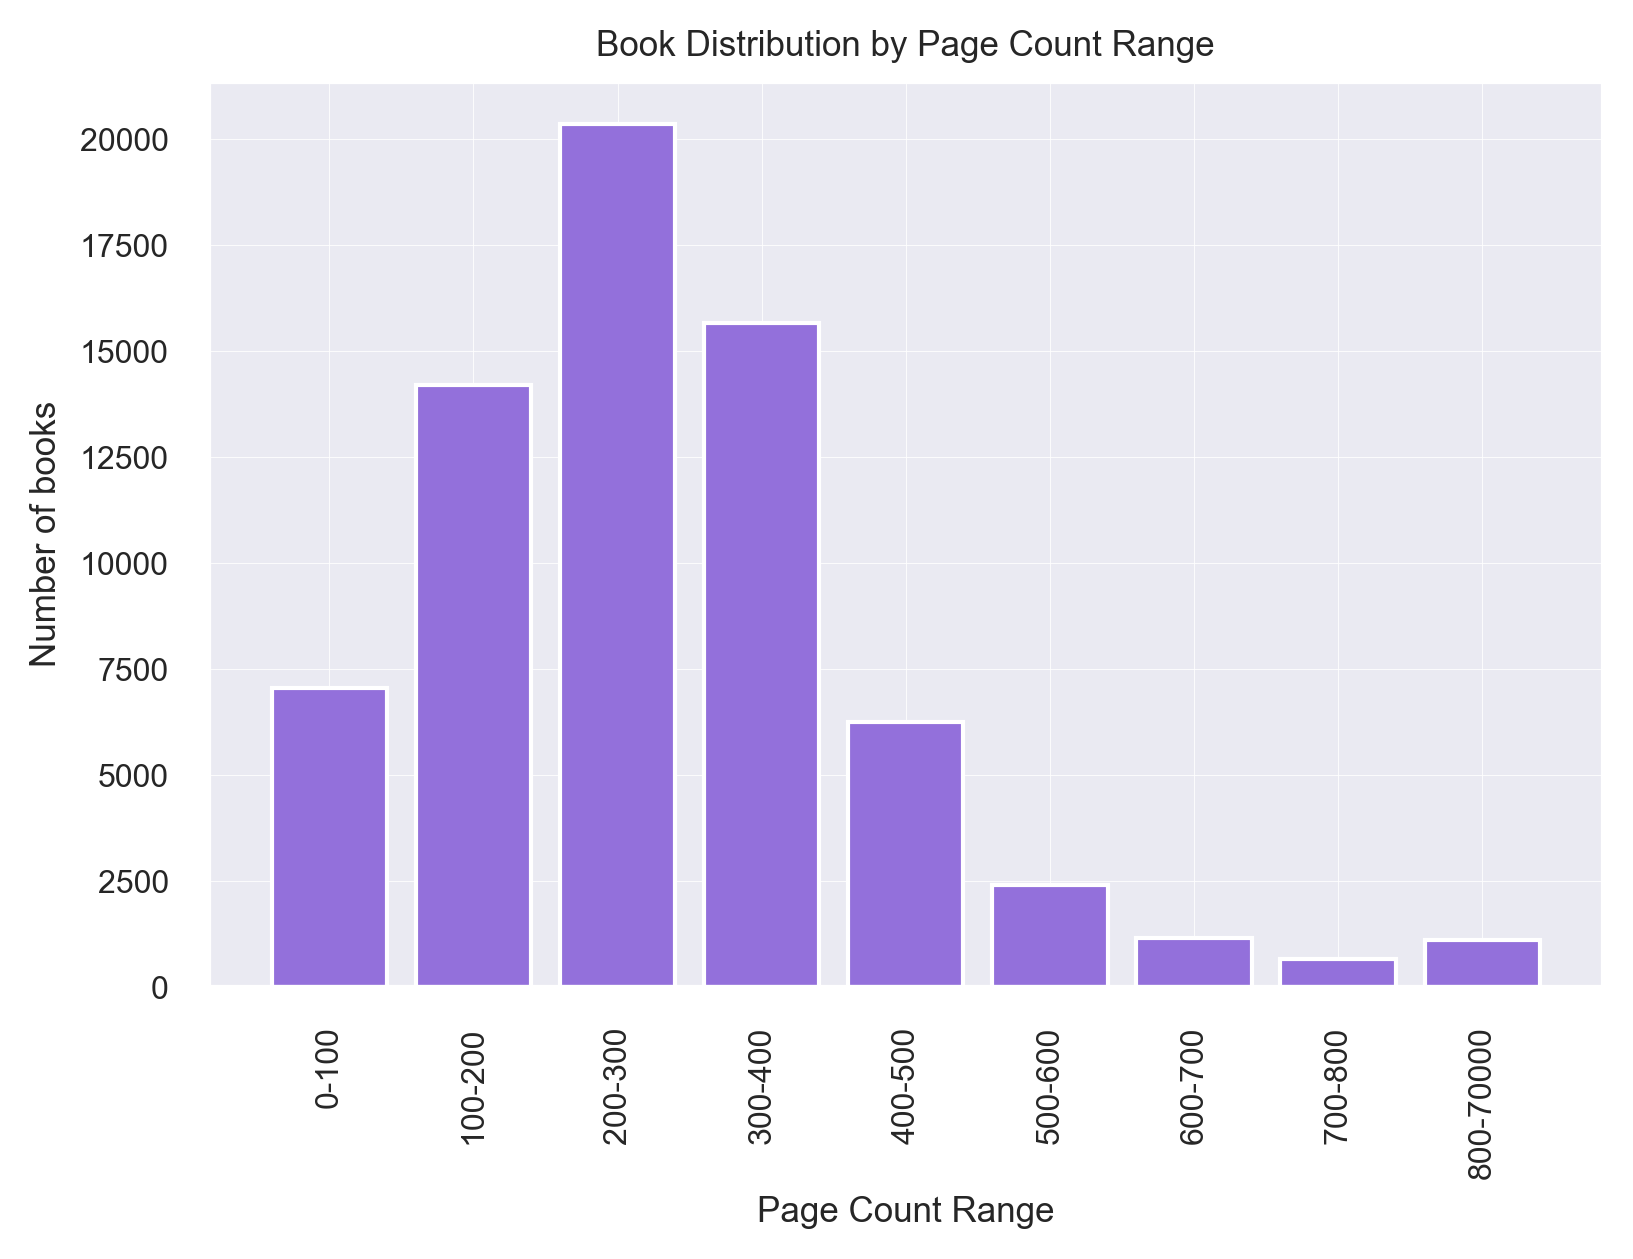

In [33]:
sns.set(style = 'darkgrid',font_scale=0.70,rc={"grid.linewidth": 0.2})
plt.figure(dpi=300)

plt.title("Book Distribution by Page Count Range")
plt.xlabel("Page Count Range")
plt.ylabel("Number of books")
plt.xticks(rotation=90)
plt.bar(list(page_range.keys()), list(page_range.values()), color='mediumpurple')
plt.show()